# Katrina Tang

## Research question/interests

**My part of the project will be looking further into the demographic of Canadianmetropolitan.**

### I changed my research question to just focus on age demographic of metropolitans instead of both gender and age.

I will be analyzing the age ranges of 20-39, 40-59 and then 60-79 within Canadian metropolitians.
I will be visualizing age groups within canadian cities and analyzing their distributions within the top 5 cites of the highest age disttribution. 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='whitegrid', font_scale=2)

DailyInterestRate = pd.read_csv("../data/raw/DailyInterestRates/DailyInterestRates.csv")
NewHousingPIndex = pd.read_csv("../data/raw/NewHousingPIndex/NewHousingPIndex.csv")
NewInventory = pd.read_csv("../data/raw/NewInventory/NewInventory.csv", low_memory = False)
PE_Wrangled = pd.read_csv("../data/processed/PE_Wrangled_Final.csv")

In [3]:
PE_Wrangled.info()
PE_Wrangled.head(15)
PE_Wrangled.sample(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174570 entries, 0 to 174569
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  174570 non-null  int64  
 1   REF_DATE    174570 non-null  object 
 2   GEO         174570 non-null  object 
 3   Sex         174570 non-null  object 
 4   Age group   174570 non-null  object 
 5   UOM         174570 non-null  object 
 6   VALUE       174570 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 9.3+ MB


Unnamed: 0    REF_DATE                                    GEO  \
171112      171112  2022-01-01                        London, Ontario   
130913      130913  2017-01-01                        Guelph, Ontario   
29619        29619  2004-01-01                   Regina, Saskatchewan   
112297      112297  2015-01-01                     Sherbrooke, Quebec   
44433        44433  2006-01-01                       Windsor, Ontario   
79491        79491  2011-01-01  St. John's, Newfoundland and Labrador   
6789          6789  2001-01-01                      Edmonton, Alberta   
22689        22689  2003-01-01                      Edmonton, Alberta   
78781        78781  2010-01-01            Vancouver, British Columbia   
120980      120980  2016-01-01                       Montréal, Quebec   
115969      115969  2015-01-01               Greater Sudbury, Ontario   
4296          4296  2001-01-01                        London, Ontario   
50406        50406  2007-01-01                      Hamilton, Ontario   
42832        42832  2006-01-01        St. Catharines-Niagara, Ontario   
158835      158835  2021-01-01  St. John's, Newfoundland and Labrador   

               Sex       Age group      UOM      VALUE  
171112     Females        88 years  Persons      871.0  
130913       Males  35 to 39 years  Persons     5308.0  
29619      Females        52 years  Persons     1306.0  
112297       Males        46 years  Persons     1254.0  
44433      Females  35 to 39 years  Persons    12519.0  
79491        Males        20 years  Persons     1507.0  
6789       Females         2 years  Persons     5537.0  
22689      Females        27 years  Persons     7539.0  
78781        Males         4 years  Persons    11431.0  
120980     Females        All ages  Persons  2094721.0  
115969  Both sexes  40 to 44 years  Persons    10846.0  
4296         Males        33 years  Persons     3291.0  
50406   Both sexes        29 years  Persons     8809.0  
42832   Both sexes        42 years  Persons     6536.0  
158835       Males        15 years  Persons     1143.0


Logan Hernandez my team member, graceously wrangled the data and processed a final version of the Population dataset. 


# Categorical data EDA

In [12]:
PE_age = PE_Wrangled.sort_values('Age group').reset_index()
PE_age = PE_Wrangled.drop(columns=['Unnamed: 0'])
PE_age

REF_DATE                                    GEO         Sex  \
0       2001-01-01  St. John's, Newfoundland and Labrador  Both sexes   
1       2001-01-01  St. John's, Newfoundland and Labrador  Both sexes   
2       2001-01-01  St. John's, Newfoundland and Labrador  Both sexes   
3       2001-01-01  St. John's, Newfoundland and Labrador  Both sexes   
4       2001-01-01  St. John's, Newfoundland and Labrador  Both sexes   
...            ...                                    ...         ...   
174565  2022-01-01             Victoria, British Columbia     Females   
174566  2022-01-01             Victoria, British Columbia     Females   
174567  2022-01-01             Victoria, British Columbia     Females   
174568  2022-01-01             Victoria, British Columbia     Females   
174569  2022-01-01             Victoria, British Columbia     Females   

                 Age group      UOM     VALUE  
0                 All ages  Persons  176468.0  
1             0 to 4 years  Persons    9317.0  
2                  0 years  Persons    1839.0  
3                   1 year  Persons    1880.0  
4                  2 years  Persons    1785.0  
...                    ...      ...       ...  
174565       0 to 14 years  Persons   24966.0  
174566      15 to 64 years  Persons  139632.0  
174567  65 years and older  Persons   52623.0  
174568          Median age    Years      45.2  
174569         Average age    Years      45.5  

[174570 rows x 6 columns]

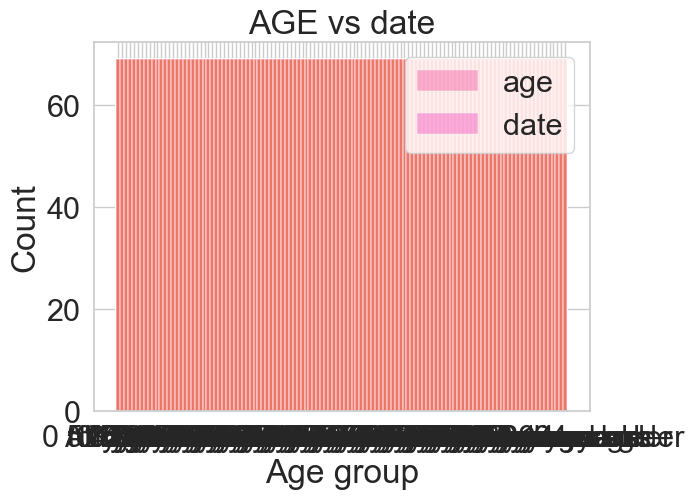

In [13]:
    sns.histplot(data=PE_Wrangled, x='Age group', hue='REF_DATE').set_title("AGE vs date")
    plt.legend(labels=['age', 'date'])
    plt.show()

In [14]:
groups = sorted(PE_Wrangled['Age group'].unique().tolist())
groups

['0 to 14 years',
 '0 to 4 years',
 '0 years',
 '1 year',
 '10 to 14 years',
 '10 years',
 '11 years',
 '12 years',
 '13 years',
 '14 years',
 '15 to 19 years',
 '15 to 64 years',
 '15 years',
 '16 years',
 '17 years',
 '18 years',
 '19 years',
 '2 years',
 '20 to 24 years',
 '20 years',
 '21 years',
 '22 years',
 '23 years',
 '24 years',
 '25 to 29 years',
 '25 years',
 '26 years',
 '27 years',
 '28 years',
 '29 years',
 '3 years',
 '30 to 34 years',
 '30 years',
 '31 years',
 '32 years',
 '33 years',
 '34 years',
 '35 to 39 years',
 '35 years',
 '36 years',
 '37 years',
 '38 years',
 '39 years',
 '4 years',
 '40 to 44 years',
 '40 years',
 '41 years',
 '42 years',
 '43 years',
 '44 years',
 '45 to 49 years',
 '45 years',
 '46 years',
 '47 years',
 '48 years',
 '49 years',
 '5 to 9 years',
 '5 years',
 '50 to 54 years',
 '50 years',
 '51 years',
 '52 years',
 '53 years',
 '54 years',
 '55 to 59 years',
 '55 years',
 '56 years',
 '57 years',
 '58 years',
 '59 years',
 '6 years',
 '60 t

In [15]:
age_values = ['20 to 24 years', '25 to 29 years', '30 to 34 years', '35 to 39 years',
              '40 to 44 years', '45 to 49 years', '50 to 54 years', '55 to 59 years',
              '60 to 64 years', '65 to 69 years', '70 to 74 years', '75 to 79 years']
PE_Wrangled = PE_Wrangled[PE_Wrangled['Age group'].isin(age_values)]
PE_Wrangled = PE_Wrangled.reset_index(drop=True)
PE_Wrangled = PE_Wrangled.drop(columns=['Unnamed: 0'])
PE_Wrangled

REF_DATE                                    GEO         Sex  \
0      2001-01-01  St. John's, Newfoundland and Labrador  Both sexes   
1      2001-01-01  St. John's, Newfoundland and Labrador  Both sexes   
2      2001-01-01  St. John's, Newfoundland and Labrador  Both sexes   
3      2001-01-01  St. John's, Newfoundland and Labrador  Both sexes   
4      2001-01-01  St. John's, Newfoundland and Labrador  Both sexes   
...           ...                                    ...         ...   
18211  2022-01-01             Victoria, British Columbia     Females   
18212  2022-01-01             Victoria, British Columbia     Females   
18213  2022-01-01             Victoria, British Columbia     Females   
18214  2022-01-01             Victoria, British Columbia     Females   
18215  2022-01-01             Victoria, British Columbia     Females   

            Age group      UOM    VALUE  
0      20 to 24 years  Persons  14642.0  
1      25 to 29 years  Persons  13039.0  
2      30 to 34 years  Persons  13631.0  
3      35 to 39 years  Persons  15269.0  
4      40 to 44 years  Persons  14961.0  
...               ...      ...      ...  
18211  55 to 59 years  Persons  14574.0  
18212  60 to 64 years  Persons  15783.0  
18213  65 to 69 years  Persons  15466.0  
18214  70 to 74 years  Persons  13738.0  
18215  75 to 79 years  Persons   9893.0  

[18216 rows x 6 columns]

In [16]:
PE_Wrangled = PE_Wrangled.drop(PE_Wrangled[PE_Wrangled['Sex'] != 'Both sexes'].index)
PE_Wrangled

REF_DATE                                    GEO         Sex  \
0      2001-01-01  St. John's, Newfoundland and Labrador  Both sexes   
1      2001-01-01  St. John's, Newfoundland and Labrador  Both sexes   
2      2001-01-01  St. John's, Newfoundland and Labrador  Both sexes   
3      2001-01-01  St. John's, Newfoundland and Labrador  Both sexes   
4      2001-01-01  St. John's, Newfoundland and Labrador  Both sexes   
...           ...                                    ...         ...   
18187  2022-01-01             Victoria, British Columbia  Both sexes   
18188  2022-01-01             Victoria, British Columbia  Both sexes   
18189  2022-01-01             Victoria, British Columbia  Both sexes   
18190  2022-01-01             Victoria, British Columbia  Both sexes   
18191  2022-01-01             Victoria, British Columbia  Both sexes   

            Age group      UOM    VALUE  
0      20 to 24 years  Persons  14642.0  
1      25 to 29 years  Persons  13039.0  
2      30 to 34 years  Persons  13631.0  
3      35 to 39 years  Persons  15269.0  
4      40 to 44 years  Persons  14961.0  
...               ...      ...      ...  
18187  55 to 59 years  Persons  28203.0  
18188  60 to 64 years  Persons  29948.0  
18189  65 to 69 years  Persons  28684.0  
18190  70 to 74 years  Persons  25530.0  
18191  75 to 79 years  Persons  18480.0  

[6072 rows x 6 columns]

In [17]:
age_groups = {'20-24': ['20 to 24 years'],
              '25-29': ['25 to 29 years'],
              '30-34': ['30 to 34 years'],
              '35-39': ['35 to 39 years'],
              '40-44': ['40 to 44 years'],
              '45-49': ['45 to 49 years'],
              '50-54': ['50 to 54 years'],
              '55-59': ['55 to 59 years'],
              '60-64': ['60 to 64 years'],
              '65-69': ['65 to 69 years'],
              '70-74': ['70 to 74 years'],
              '75-79': ['75 to 79 years']}

grouped_df = pd.DataFrame(columns=['Age group', 'total_count'])
for key in age_groups.keys():
    age_range_list = age_groups[key]
    total_count = PE_Wrangled.loc[PE_Wrangled['Age group'].isin(age_range_list), 'VALUE'].sum()
    grouped_df = grouped_df.append({'Age group': key, 'total_count': total_count}, ignore_index=True)

grouped_df

/var/folders/hk/4gnwgbn96dvb_skqmy4p4qwh0000gn/T/ipykernel_74225/490423799.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  grouped_df = grouped_df.append({'Age group': key, 'total_count': total_count}, ignore_index=True)
/var/folders/hk/4gnwgbn96dvb_skqmy4p4qwh0000gn/T/ipykernel_74225/490423799.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  grouped_df = grouped_df.append({'Age group': key, 'total_count': total_count}, ignore_index=True)
/var/folders/hk/4gnwgbn96dvb_skqmy4p4qwh0000gn/T/ipykernel_74225/490423799.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  grouped_df = grouped_df.append({'Age group': key, 'total_count': total_count}, ignore_index=True)
/var/folders/hk/4gnwgbn96dvb_skqmy4p4qwh0000gn/T/ipyker

Age group  total_count
0      20-24   33659774.0
1      25-29   35005839.0
2      30-34   34978605.0
3      35-39   35155309.0
4      40-44   35524387.0
5      45-49   35151806.0
6      50-54   33651524.0
7      55-59   30423627.0
8      60-64   25383875.0
9      65-69   20385820.0
10     70-74   16257437.0
11     75-79   12462437.0

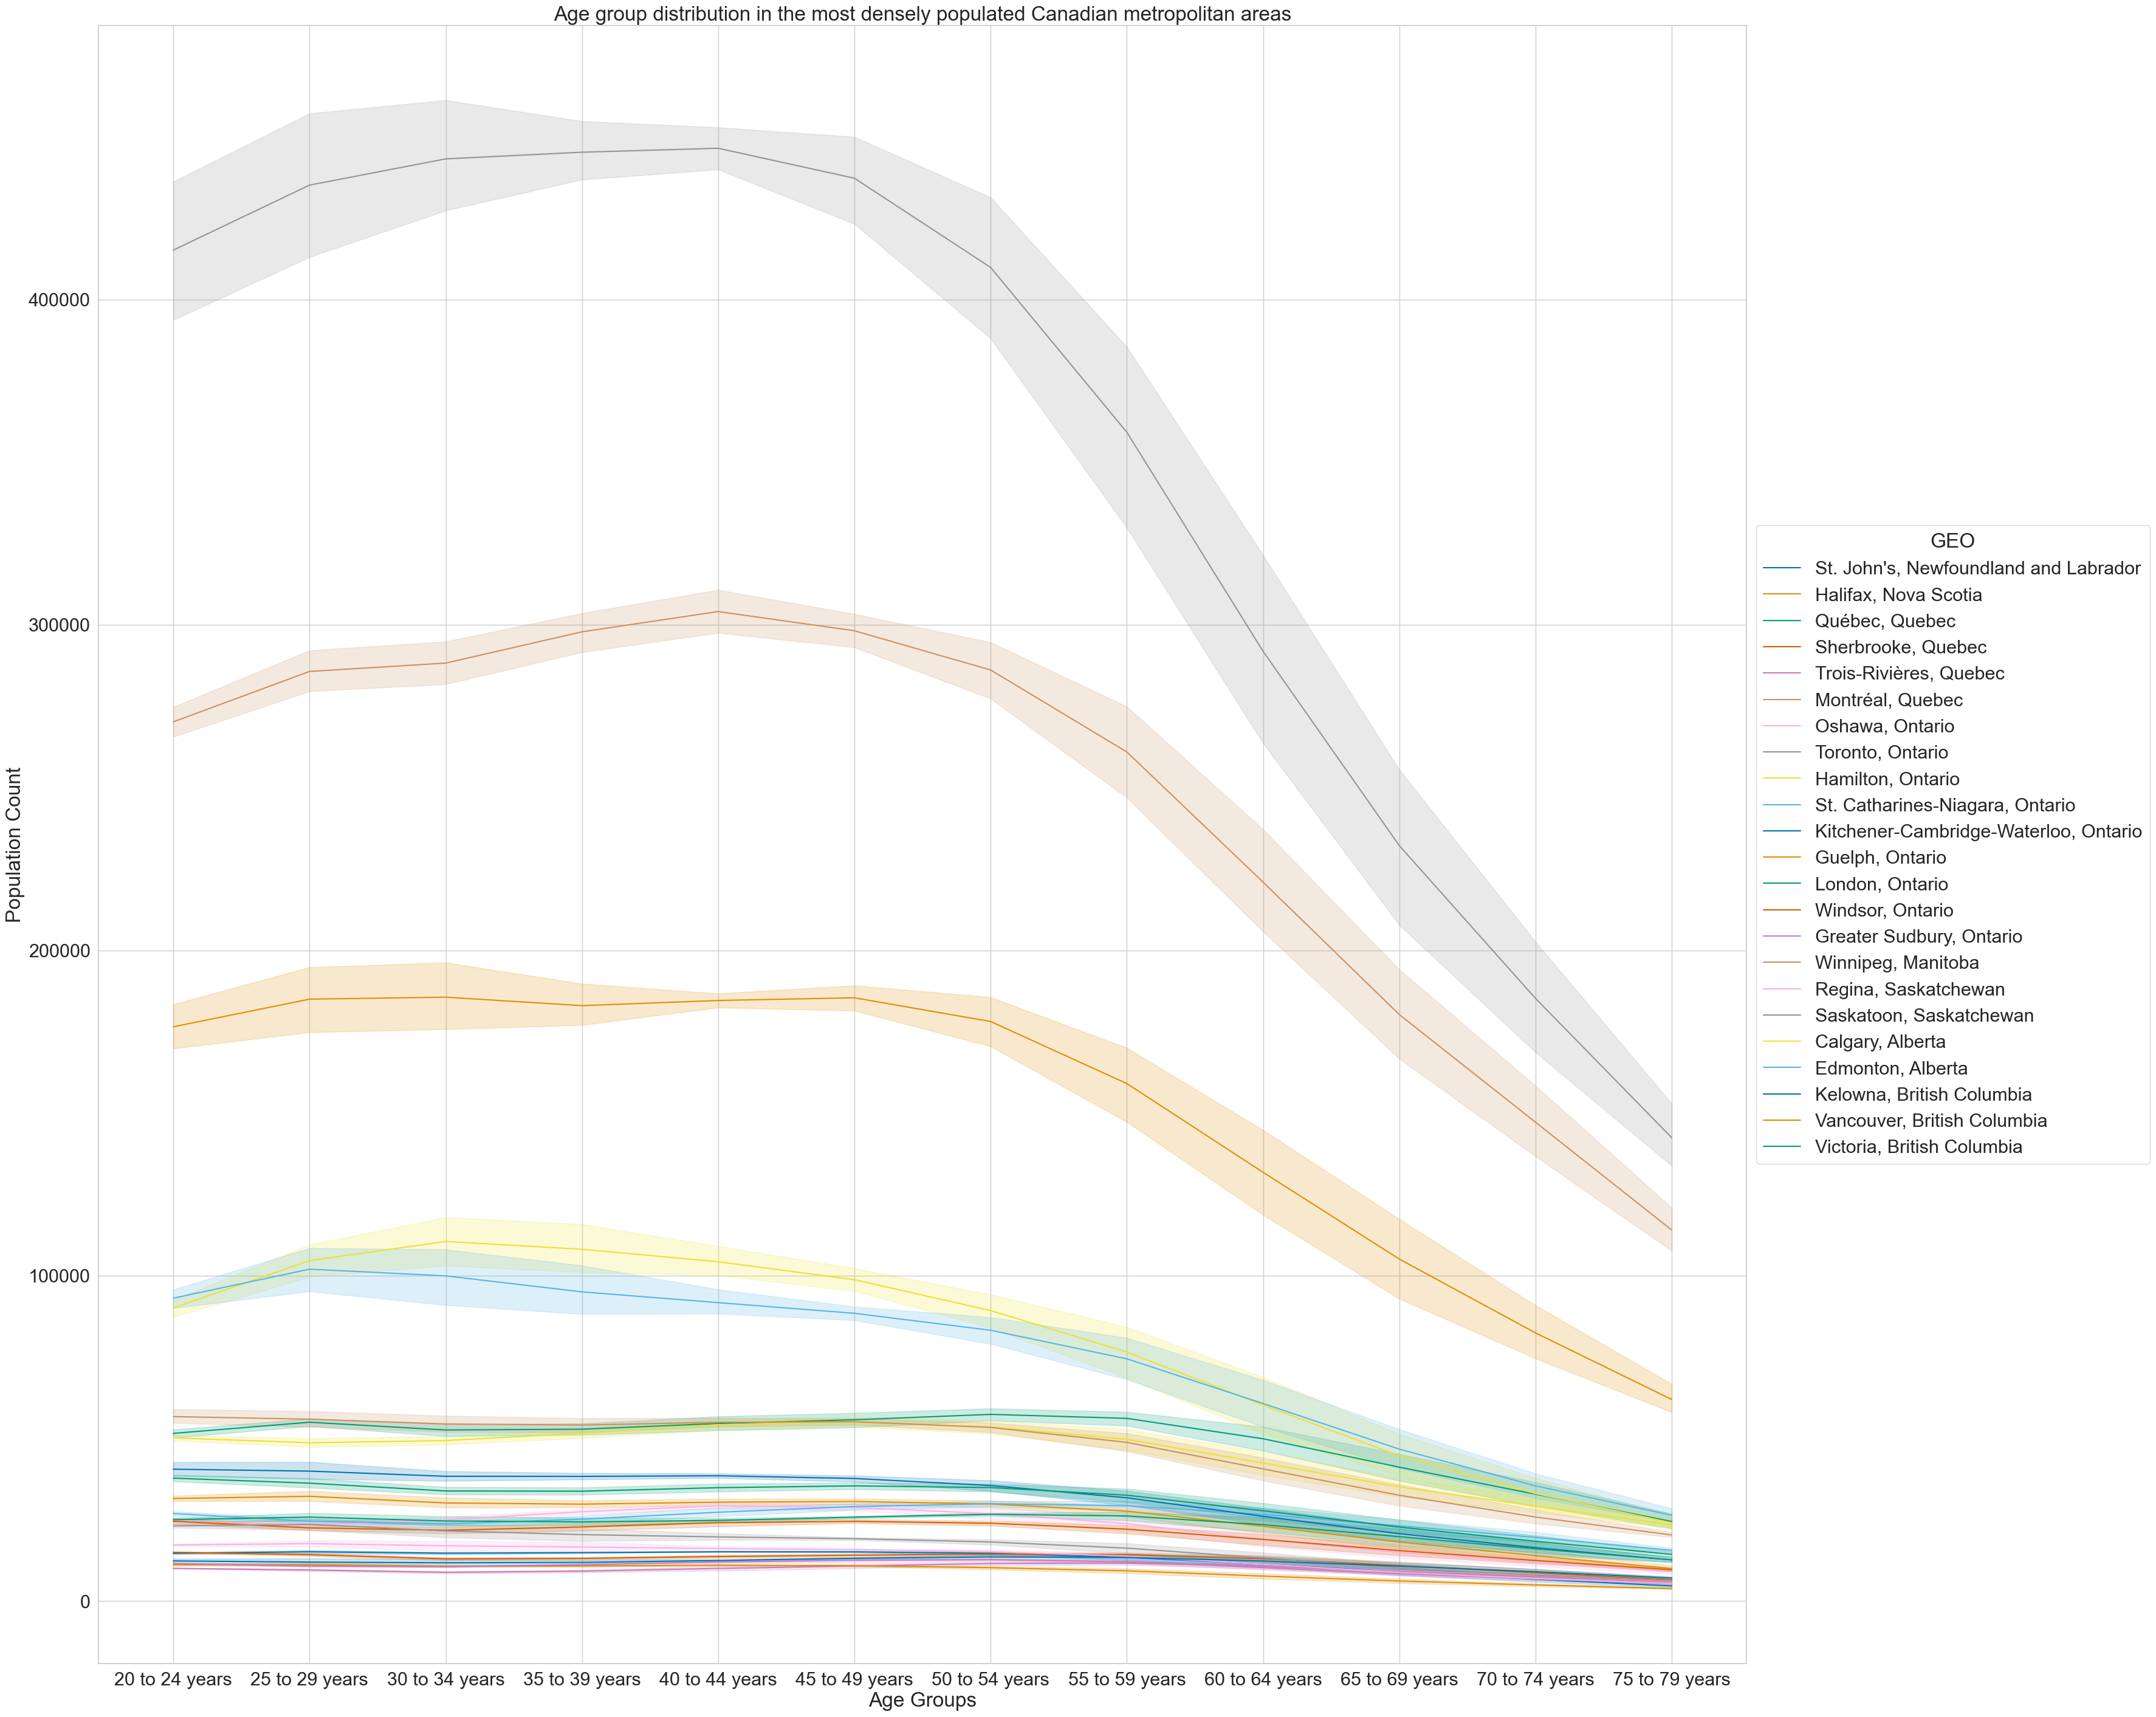

In [18]:

sns.set_style("whitegrid")
plt.figure(figsize=(35,35))

pop = sns.lineplot(x='Age group', y='VALUE', hue='GEO', data=PE_Wrangled, palette='colorblind')

plt.legend(title="GEO", loc="center left", bbox_to_anchor=(1, 0.5))
plt.xlabel("Age Groups")
plt.ylabel("Population Count")
plt.title("Age group distribution in the most densely populated Canadian metropolitan areas")
plt.show()

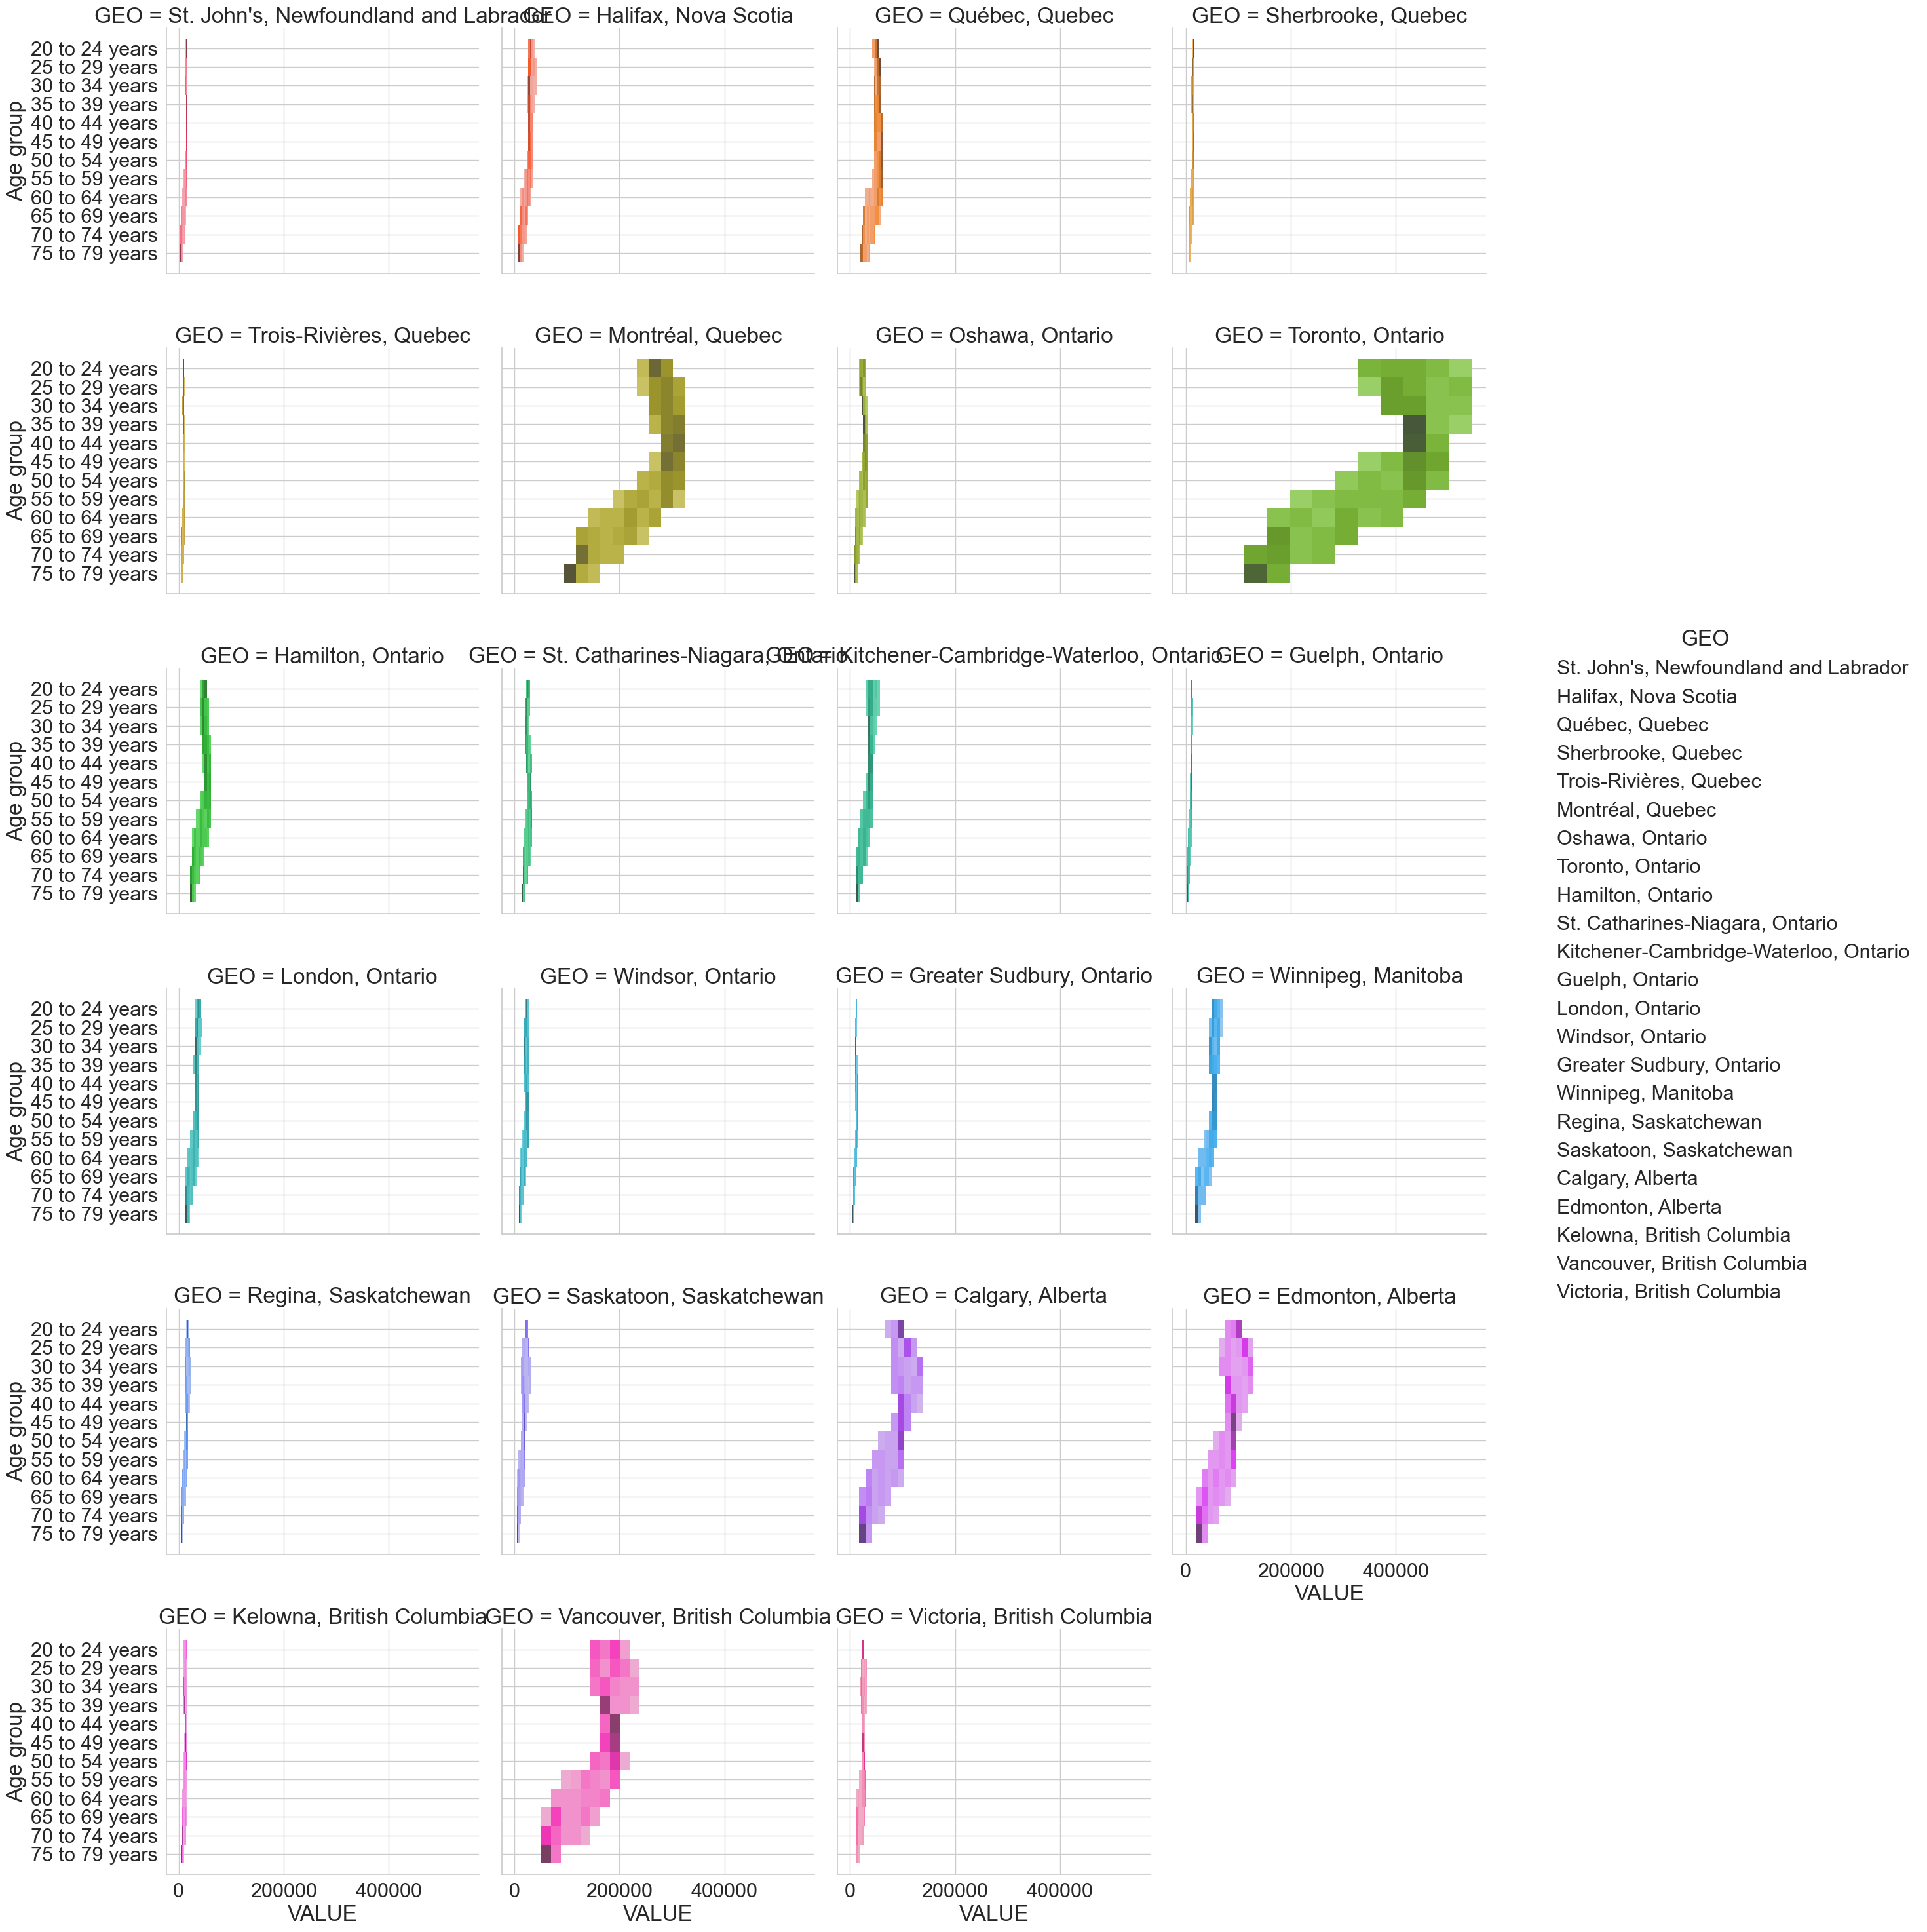

In [20]:
g = sns.FacetGrid(PE_Wrangled, col='GEO', hue='GEO', col_wrap=4, height=5, aspect=1.2)
g.map(sns.histplot, 'VALUE', 'Age group')
g.add_legend()
plt.show()

In [21]:
selected_cities = ['Vancouver, British Columbia', 'Calgary, Alberta', 'Edmonton, Alberta', 'Winnipeg, Manitoba', 'Toronto, Ontario', 'Montréal, Quebec']
filtered_df = PE_Wrangled[PE_Wrangled['GEO'].isin(selected_cities)]
filtered_df

REF_DATE                          GEO         Sex       Age group  \
180    2001-01-01             Montréal, Quebec  Both sexes  20 to 24 years   
181    2001-01-01             Montréal, Quebec  Both sexes  25 to 29 years   
182    2001-01-01             Montréal, Quebec  Both sexes  30 to 34 years   
183    2001-01-01             Montréal, Quebec  Both sexes  35 to 39 years   
184    2001-01-01             Montréal, Quebec  Both sexes  40 to 44 years   
...           ...                          ...         ...             ...   
18151  2022-01-01  Vancouver, British Columbia  Both sexes  55 to 59 years   
18152  2022-01-01  Vancouver, British Columbia  Both sexes  60 to 64 years   
18153  2022-01-01  Vancouver, British Columbia  Both sexes  65 to 69 years   
18154  2022-01-01  Vancouver, British Columbia  Both sexes  70 to 74 years   
18155  2022-01-01  Vancouver, British Columbia  Both sexes  75 to 79 years   

           UOM     VALUE  
180    Persons  261069.0  
181    Persons  254750.0  
182    Persons  269964.0  
183    Persons  316527.0  
184    Persons  317236.0  
...        ...       ...  
18151  Persons  191116.0  
18152  Persons  179295.0  
18153  Persons  153897.0  
18154  Persons  126083.0  
18155  Persons   88064.0  

[1584 rows x 6 columns]

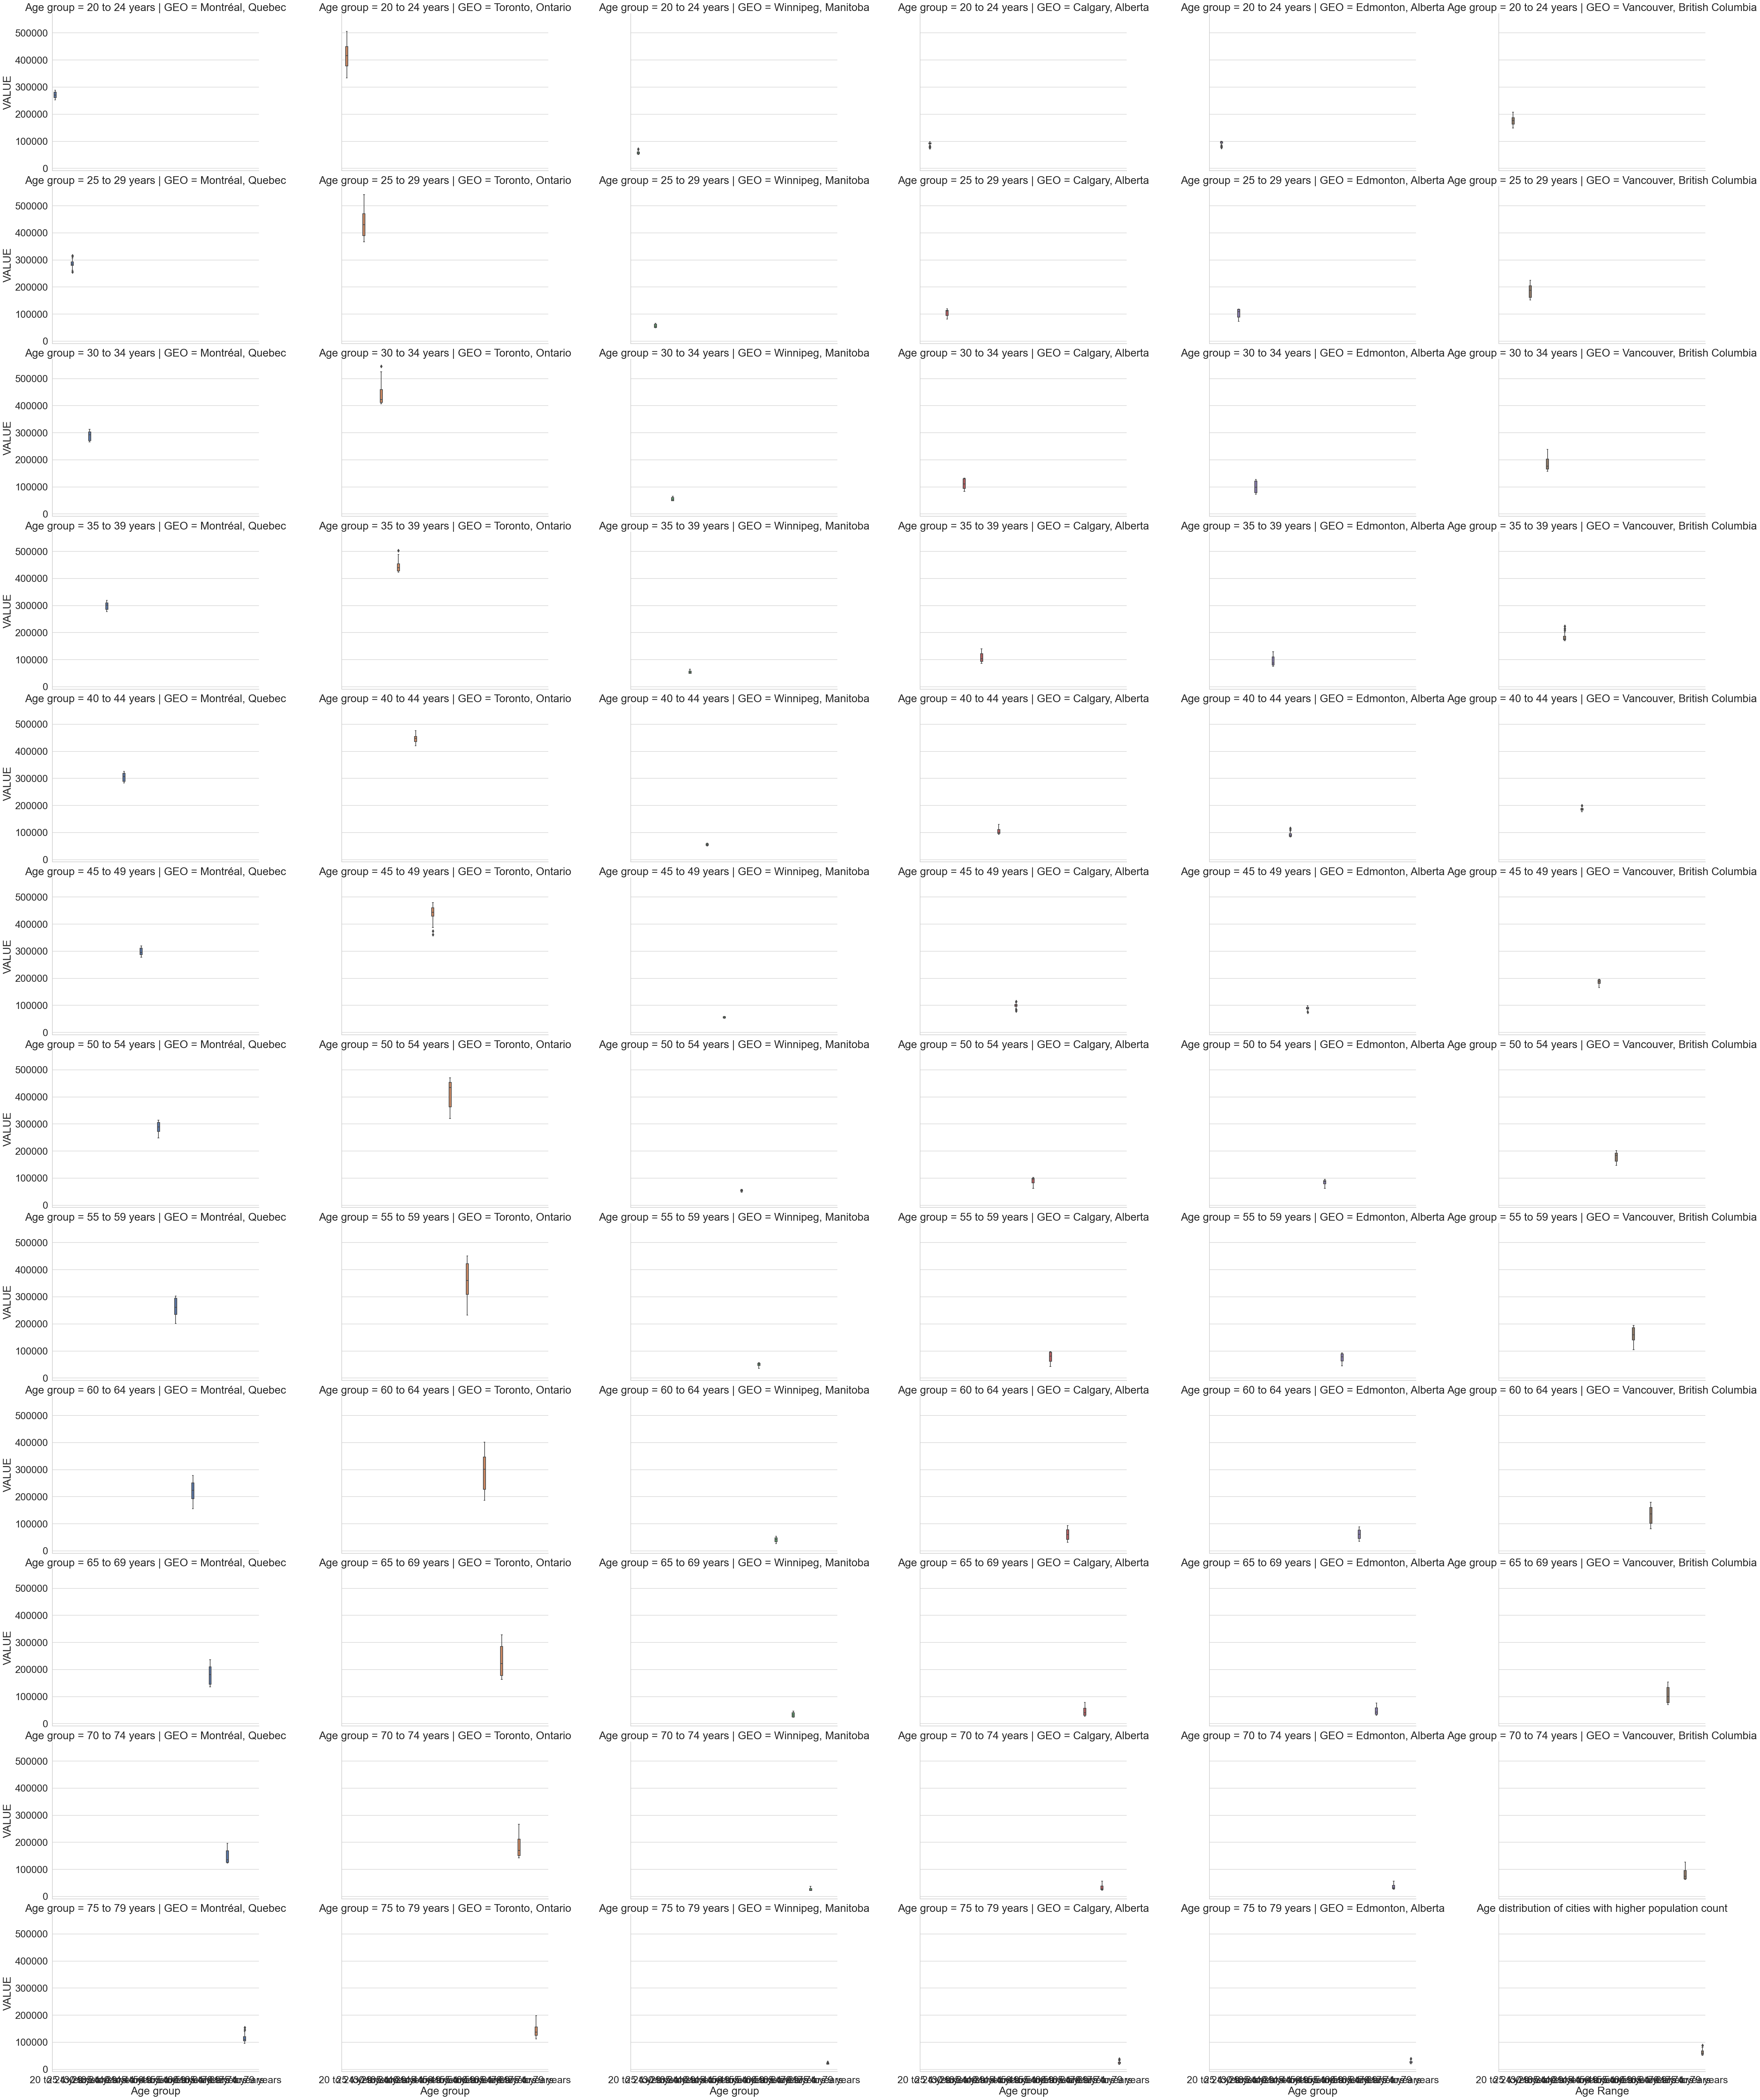

In [69]:
sns.catplot(x="Age group", y="VALUE", hue="GEO", kind="box", data=filtered_df, height=6, aspect=1.5, col="GEO", row="Age group")

plt.xlabel("Age Range")
plt.ylabel("Population ")
plt.title("Age distribution of cities with higher population count")
plt.subplots_adjust(top=0.9, hspace=.1, wspace=.4)

plt.show()

I split the graphs up into the cities with a high count of total age groups. The plots above show the cities with the highest count of age groups. I will make more ploots below to show cities with the lower total count of age groups. 

In [23]:
selected_cities_lowerTC = ["St. John's, Newfoundland and Labrador", 'Halifax, Nova Scotia', 'Québec, Quebec', 'Sherbrook, Quebec', 'Trois-Rivières, Quebec', 'Oshawa, Quebec', 'Hamilton, Quebec', 'St. Catharines-Niagara, Ontario', 'Kitchener-Cambridge-Waterloo, Ontario', 'Guelph, Ontario', 'London, Ontario', 'Windsor, Ontario', 'Greater Sudbury, Ontario', 'Regina, Saskatchewan', 'Saskatoon, Saskatchewan', 'Kelowna, British Columbia', 'Victoria, British Columbia']
filtered_df_lowerTC = PE_Wrangled[PE_Wrangled['GEO'].isin(selected_cities_lowerTC)]
filtered_df_lowerTC

REF_DATE                                    GEO         Sex  \
0      2001-01-01  St. John's, Newfoundland and Labrador  Both sexes   
1      2001-01-01  St. John's, Newfoundland and Labrador  Both sexes   
2      2001-01-01  St. John's, Newfoundland and Labrador  Both sexes   
3      2001-01-01  St. John's, Newfoundland and Labrador  Both sexes   
4      2001-01-01  St. John's, Newfoundland and Labrador  Both sexes   
...           ...                                    ...         ...   
18187  2022-01-01             Victoria, British Columbia  Both sexes   
18188  2022-01-01             Victoria, British Columbia  Both sexes   
18189  2022-01-01             Victoria, British Columbia  Both sexes   
18190  2022-01-01             Victoria, British Columbia  Both sexes   
18191  2022-01-01             Victoria, British Columbia  Both sexes   

            Age group      UOM    VALUE  
0      20 to 24 years  Persons  14642.0  
1      25 to 29 years  Persons  13039.0  
2      30 to 34 years  Persons  13631.0  
3      35 to 39 years  Persons  15269.0  
4      40 to 44 years  Persons  14961.0  
...               ...      ...      ...  
18187  55 to 59 years  Persons  28203.0  
18188  60 to 64 years  Persons  29948.0  
18189  65 to 69 years  Persons  28684.0  
18190  70 to 74 years  Persons  25530.0  
18191  75 to 79 years  Persons  18480.0  

[3696 rows x 6 columns]

In [ ]:
sns.catplot(x="Age group", y="VALUE", hue="GEO", kind="box", data=filtered_df_lowerTC, height=6, aspect=1.5, col="GEO", row="Age group")

plt.xlabel("Age Range")
plt.ylabel("Population")
plt.title("Age distribution of Cities with lower population count")
plt.subplots_adjust(top=0.9, hspace=.4, wspace=.7)

plt.show()

To make these plots look better, visually, i think i will split them up by province. 

In [25]:
selected_cities_NFAL = ["St. John's, Newfoundland and Labrador"]
filtered_df_NFAL = PE_Wrangled[PE_Wrangled['GEO'].isin(selected_cities_NFAL)]
filtered_df_NFAL

REF_DATE                                    GEO         Sex  \
0      2001-01-01  St. John's, Newfoundland and Labrador  Both sexes   
1      2001-01-01  St. John's, Newfoundland and Labrador  Both sexes   
2      2001-01-01  St. John's, Newfoundland and Labrador  Both sexes   
3      2001-01-01  St. John's, Newfoundland and Labrador  Both sexes   
4      2001-01-01  St. John's, Newfoundland and Labrador  Both sexes   
...           ...                                    ...         ...   
17395  2022-01-01  St. John's, Newfoundland and Labrador  Both sexes   
17396  2022-01-01  St. John's, Newfoundland and Labrador  Both sexes   
17397  2022-01-01  St. John's, Newfoundland and Labrador  Both sexes   
17398  2022-01-01  St. John's, Newfoundland and Labrador  Both sexes   
17399  2022-01-01  St. John's, Newfoundland and Labrador  Both sexes   

            Age group      UOM    VALUE  
0      20 to 24 years  Persons  14642.0  
1      25 to 29 years  Persons  13039.0  
2      30 to 34 years  Persons  13631.0  
3      35 to 39 years  Persons  15269.0  
4      40 to 44 years  Persons  14961.0  
...               ...      ...      ...  
17395  55 to 59 years  Persons  15542.0  
17396  60 to 64 years  Persons  14534.0  
17397  65 to 69 years  Persons  12812.0  
17398  70 to 74 years  Persons  10653.0  
17399  75 to 79 years  Persons   7354.0  

[264 rows x 6 columns]

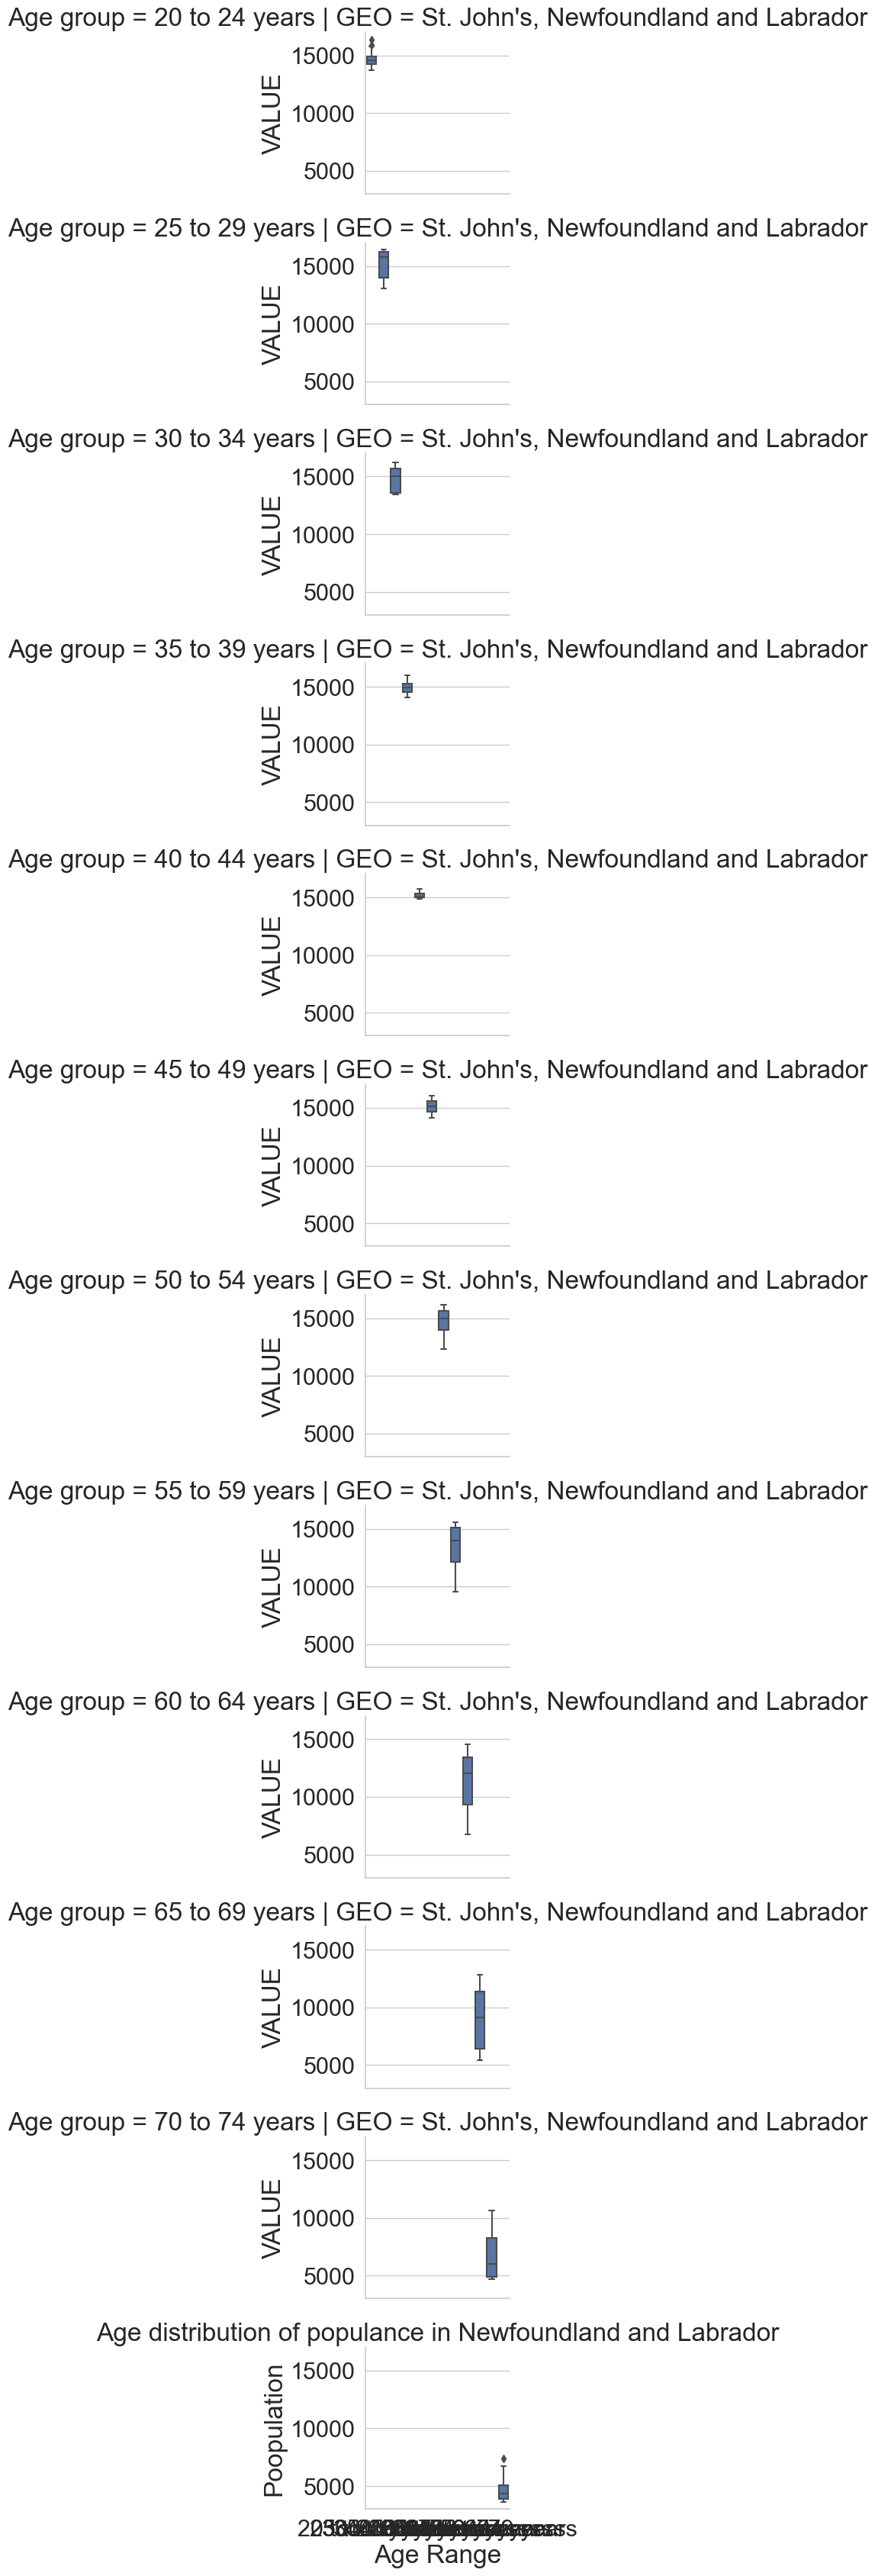

In [67]:
sns.catplot(x="Age group", y="VALUE", hue="GEO", kind="box", data=filtered_df_NFAL, height=4, aspect=1.2, col="GEO", row="Age group")

plt.xlabel("Age Range")
plt.ylabel("Poopulation")
plt.title("Age distribution of populance in Newfoundland and Labrador")
plt.subplots_adjust(top=0.7, hspace=.3, wspace=.3)

plt.show()

In [27]:
selected_cities_HAL = ['Halifax, Nova Scotia']
filtered_df_HAL = PE_Wrangled[PE_Wrangled['GEO'].isin(selected_cities_HAL)]
filtered_df_HAL

REF_DATE                   GEO         Sex       Age group      UOM  \
36     2001-01-01  Halifax, Nova Scotia  Both sexes  20 to 24 years  Persons   
37     2001-01-01  Halifax, Nova Scotia  Both sexes  25 to 29 years  Persons   
38     2001-01-01  Halifax, Nova Scotia  Both sexes  30 to 34 years  Persons   
39     2001-01-01  Halifax, Nova Scotia  Both sexes  35 to 39 years  Persons   
40     2001-01-01  Halifax, Nova Scotia  Both sexes  40 to 44 years  Persons   
...           ...                   ...         ...             ...      ...   
17431  2022-01-01  Halifax, Nova Scotia  Both sexes  55 to 59 years  Persons   
17432  2022-01-01  Halifax, Nova Scotia  Both sexes  60 to 64 years  Persons   
17433  2022-01-01  Halifax, Nova Scotia  Both sexes  65 to 69 years  Persons   
17434  2022-01-01  Halifax, Nova Scotia  Both sexes  70 to 74 years  Persons   
17435  2022-01-01  Halifax, Nova Scotia  Both sexes  75 to 79 years  Persons   

         VALUE  
36     28286.0  
37     28422.0  
38     28910.0  
39     33890.0  
40     32427.0  
...        ...  
17431  31846.0  
17432  31401.0  
17433  26374.0  
17434  21274.0  
17435  15488.0  

[264 rows x 6 columns]

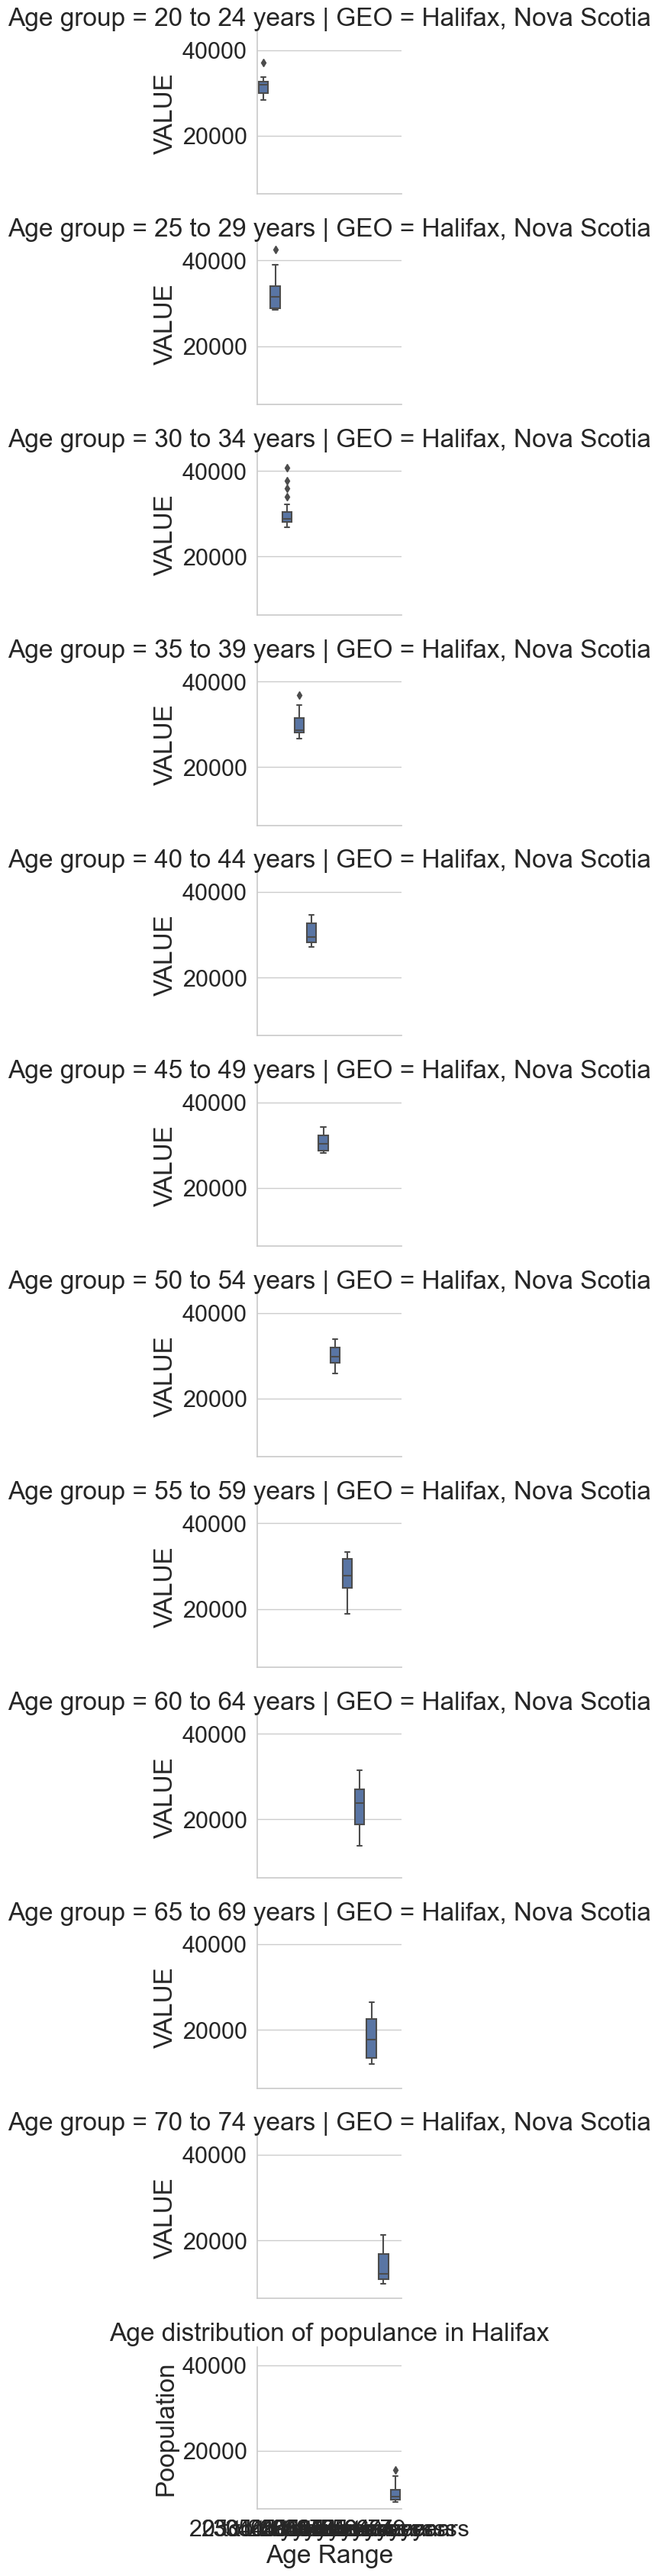

In [66]:
sns.catplot(x="Age group", y="VALUE", hue="GEO", kind="box", data=filtered_df_HAL, height=4, aspect=1.2, col="GEO", row="Age group")

plt.xlabel("Age Range")
plt.ylabel("Poopulation")
plt.title("Age distribution of populance in Halifax")
plt.subplots_adjust(top=0.7, hspace=.3, wspace=.3)

plt.show()

In [29]:
selected_cities_QUE = ['Québec, Quebec', 'Sherbrook, Quebec', 'Trois-Rivières, Quebec', 'Oshawa, Quebec', 'Hamilton, Quebec']
filtered_df_QUE = PE_Wrangled[PE_Wrangled['GEO'].isin(selected_cities_QUE)]
filtered_df_QUE

REF_DATE                     GEO         Sex       Age group  \
72     2001-01-01          Québec, Quebec  Both sexes  20 to 24 years   
73     2001-01-01          Québec, Quebec  Both sexes  25 to 29 years   
74     2001-01-01          Québec, Quebec  Both sexes  30 to 34 years   
75     2001-01-01          Québec, Quebec  Both sexes  35 to 39 years   
76     2001-01-01          Québec, Quebec  Both sexes  40 to 44 years   
...           ...                     ...         ...             ...   
17539  2022-01-01  Trois-Rivières, Quebec  Both sexes  55 to 59 years   
17540  2022-01-01  Trois-Rivières, Quebec  Both sexes  60 to 64 years   
17541  2022-01-01  Trois-Rivières, Quebec  Both sexes  65 to 69 years   
17542  2022-01-01  Trois-Rivières, Quebec  Both sexes  70 to 74 years   
17543  2022-01-01  Trois-Rivières, Quebec  Both sexes  75 to 79 years   

           UOM    VALUE  
72     Persons  54389.0  
73     Persons  47401.0  
74     Persons  47208.0  
75     Persons  57719.0  
76     Persons  62229.0  
...        ...      ...  
17539  Persons  11630.0  
17540  Persons  13296.0  
17541  Persons  12656.0  
17542  Persons  10744.0  
17543  Persons   8302.0  

[528 rows x 6 columns]

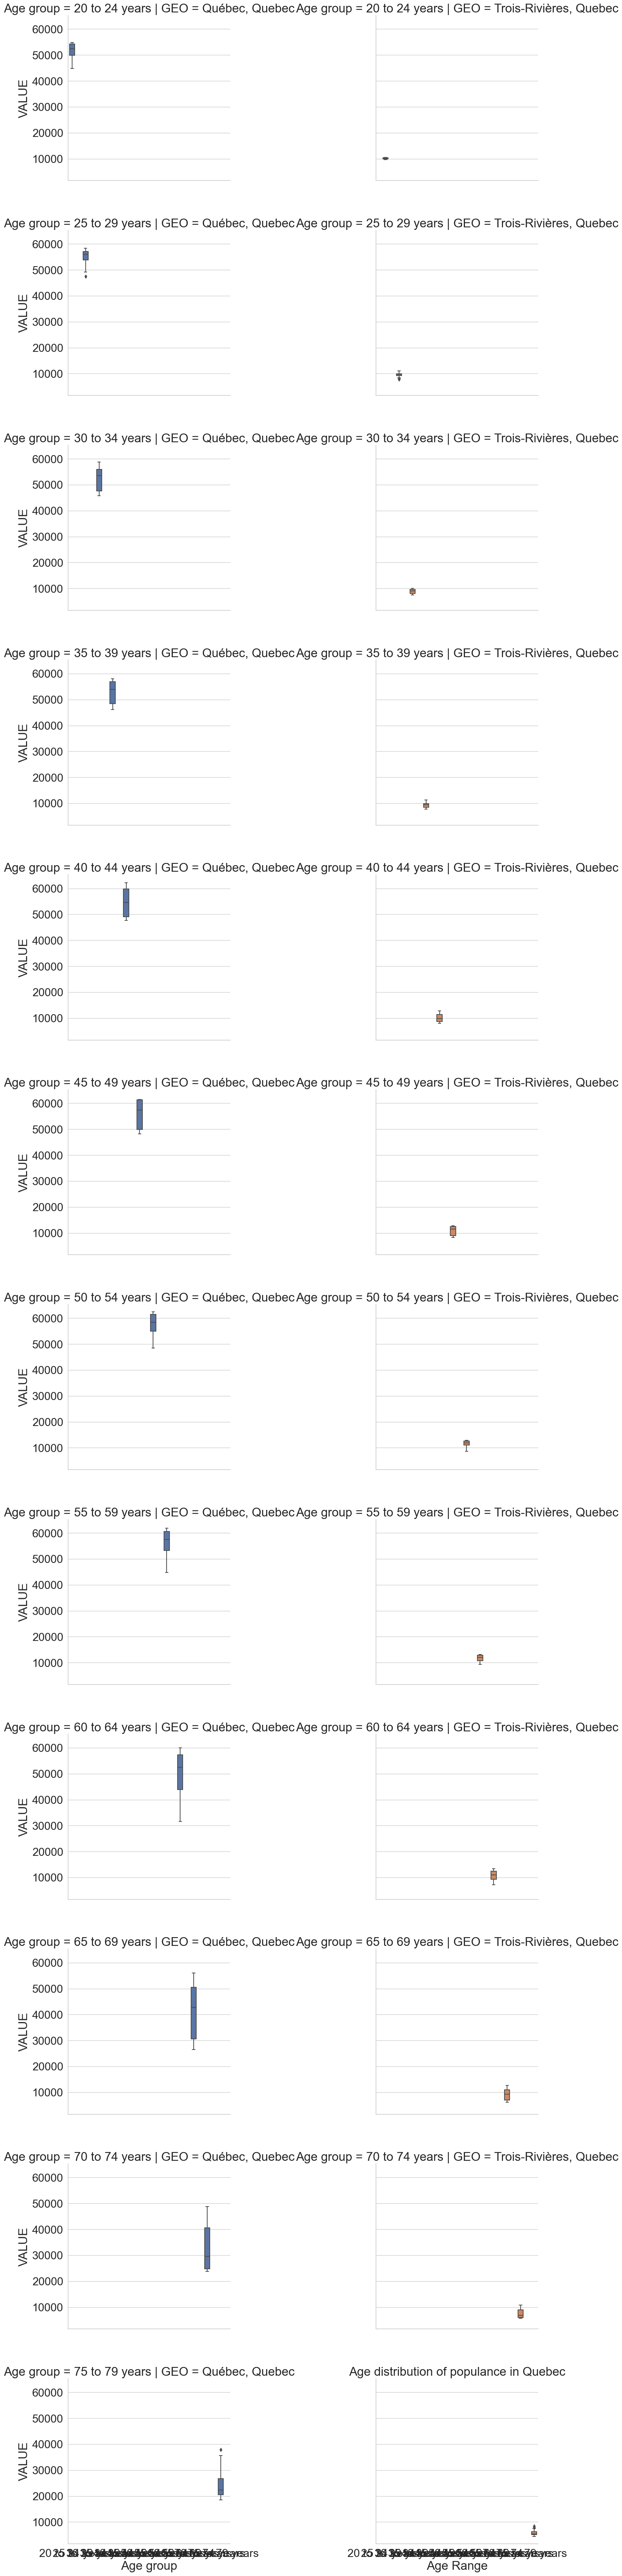

In [65]:
sns.catplot(x="Age group", y="VALUE", hue="GEO", kind="box", data=filtered_df_QUE, height=6.5, aspect=1.2, col="GEO", row="Age group")

plt.xlabel("Age Range")
plt.ylabel("Population")
plt.title("Age distribution of populance in Quebec")
plt.subplots_adjust(top=0.9, hspace=.3, wspace=.9)

plt.show()

In [31]:
selected_cities_ONT = ['St. Catharines-Niagara, Ontario', 'Kitchener-Cambridge-Waterloo, Ontario', 'Guelph, Ontario', 'London, Ontario', 'Windsor, Ontario', 'Greater Sudbury, Ontario']
filtered_df_ONT = PE_Wrangled[PE_Wrangled['GEO'].isin(selected_cities_ONT)]
filtered_df_ONT

REF_DATE                              GEO         Sex  \
324    2001-01-01  St. Catharines-Niagara, Ontario  Both sexes   
325    2001-01-01  St. Catharines-Niagara, Ontario  Both sexes   
326    2001-01-01  St. Catharines-Niagara, Ontario  Both sexes   
327    2001-01-01  St. Catharines-Niagara, Ontario  Both sexes   
328    2001-01-01  St. Catharines-Niagara, Ontario  Both sexes   
...           ...                              ...         ...   
17899  2022-01-01         Greater Sudbury, Ontario  Both sexes   
17900  2022-01-01         Greater Sudbury, Ontario  Both sexes   
17901  2022-01-01         Greater Sudbury, Ontario  Both sexes   
17902  2022-01-01         Greater Sudbury, Ontario  Both sexes   
17903  2022-01-01         Greater Sudbury, Ontario  Both sexes   

            Age group      UOM    VALUE  
324    20 to 24 years  Persons  24058.0  
325    25 to 29 years  Persons  23233.0  
326    30 to 34 years  Persons  25678.0  
327    35 to 39 years  Persons  30972.0  
328    40 to 44 years  Persons  30855.0  
...               ...      ...      ...  
17899  55 to 59 years  Persons  12760.0  
17900  60 to 64 years  Persons  12954.0  
17901  65 to 69 years  Persons  11036.0  
17902  70 to 74 years  Persons   8849.0  
17903  75 to 79 years  Persons   6638.0  

[1584 rows x 6 columns]

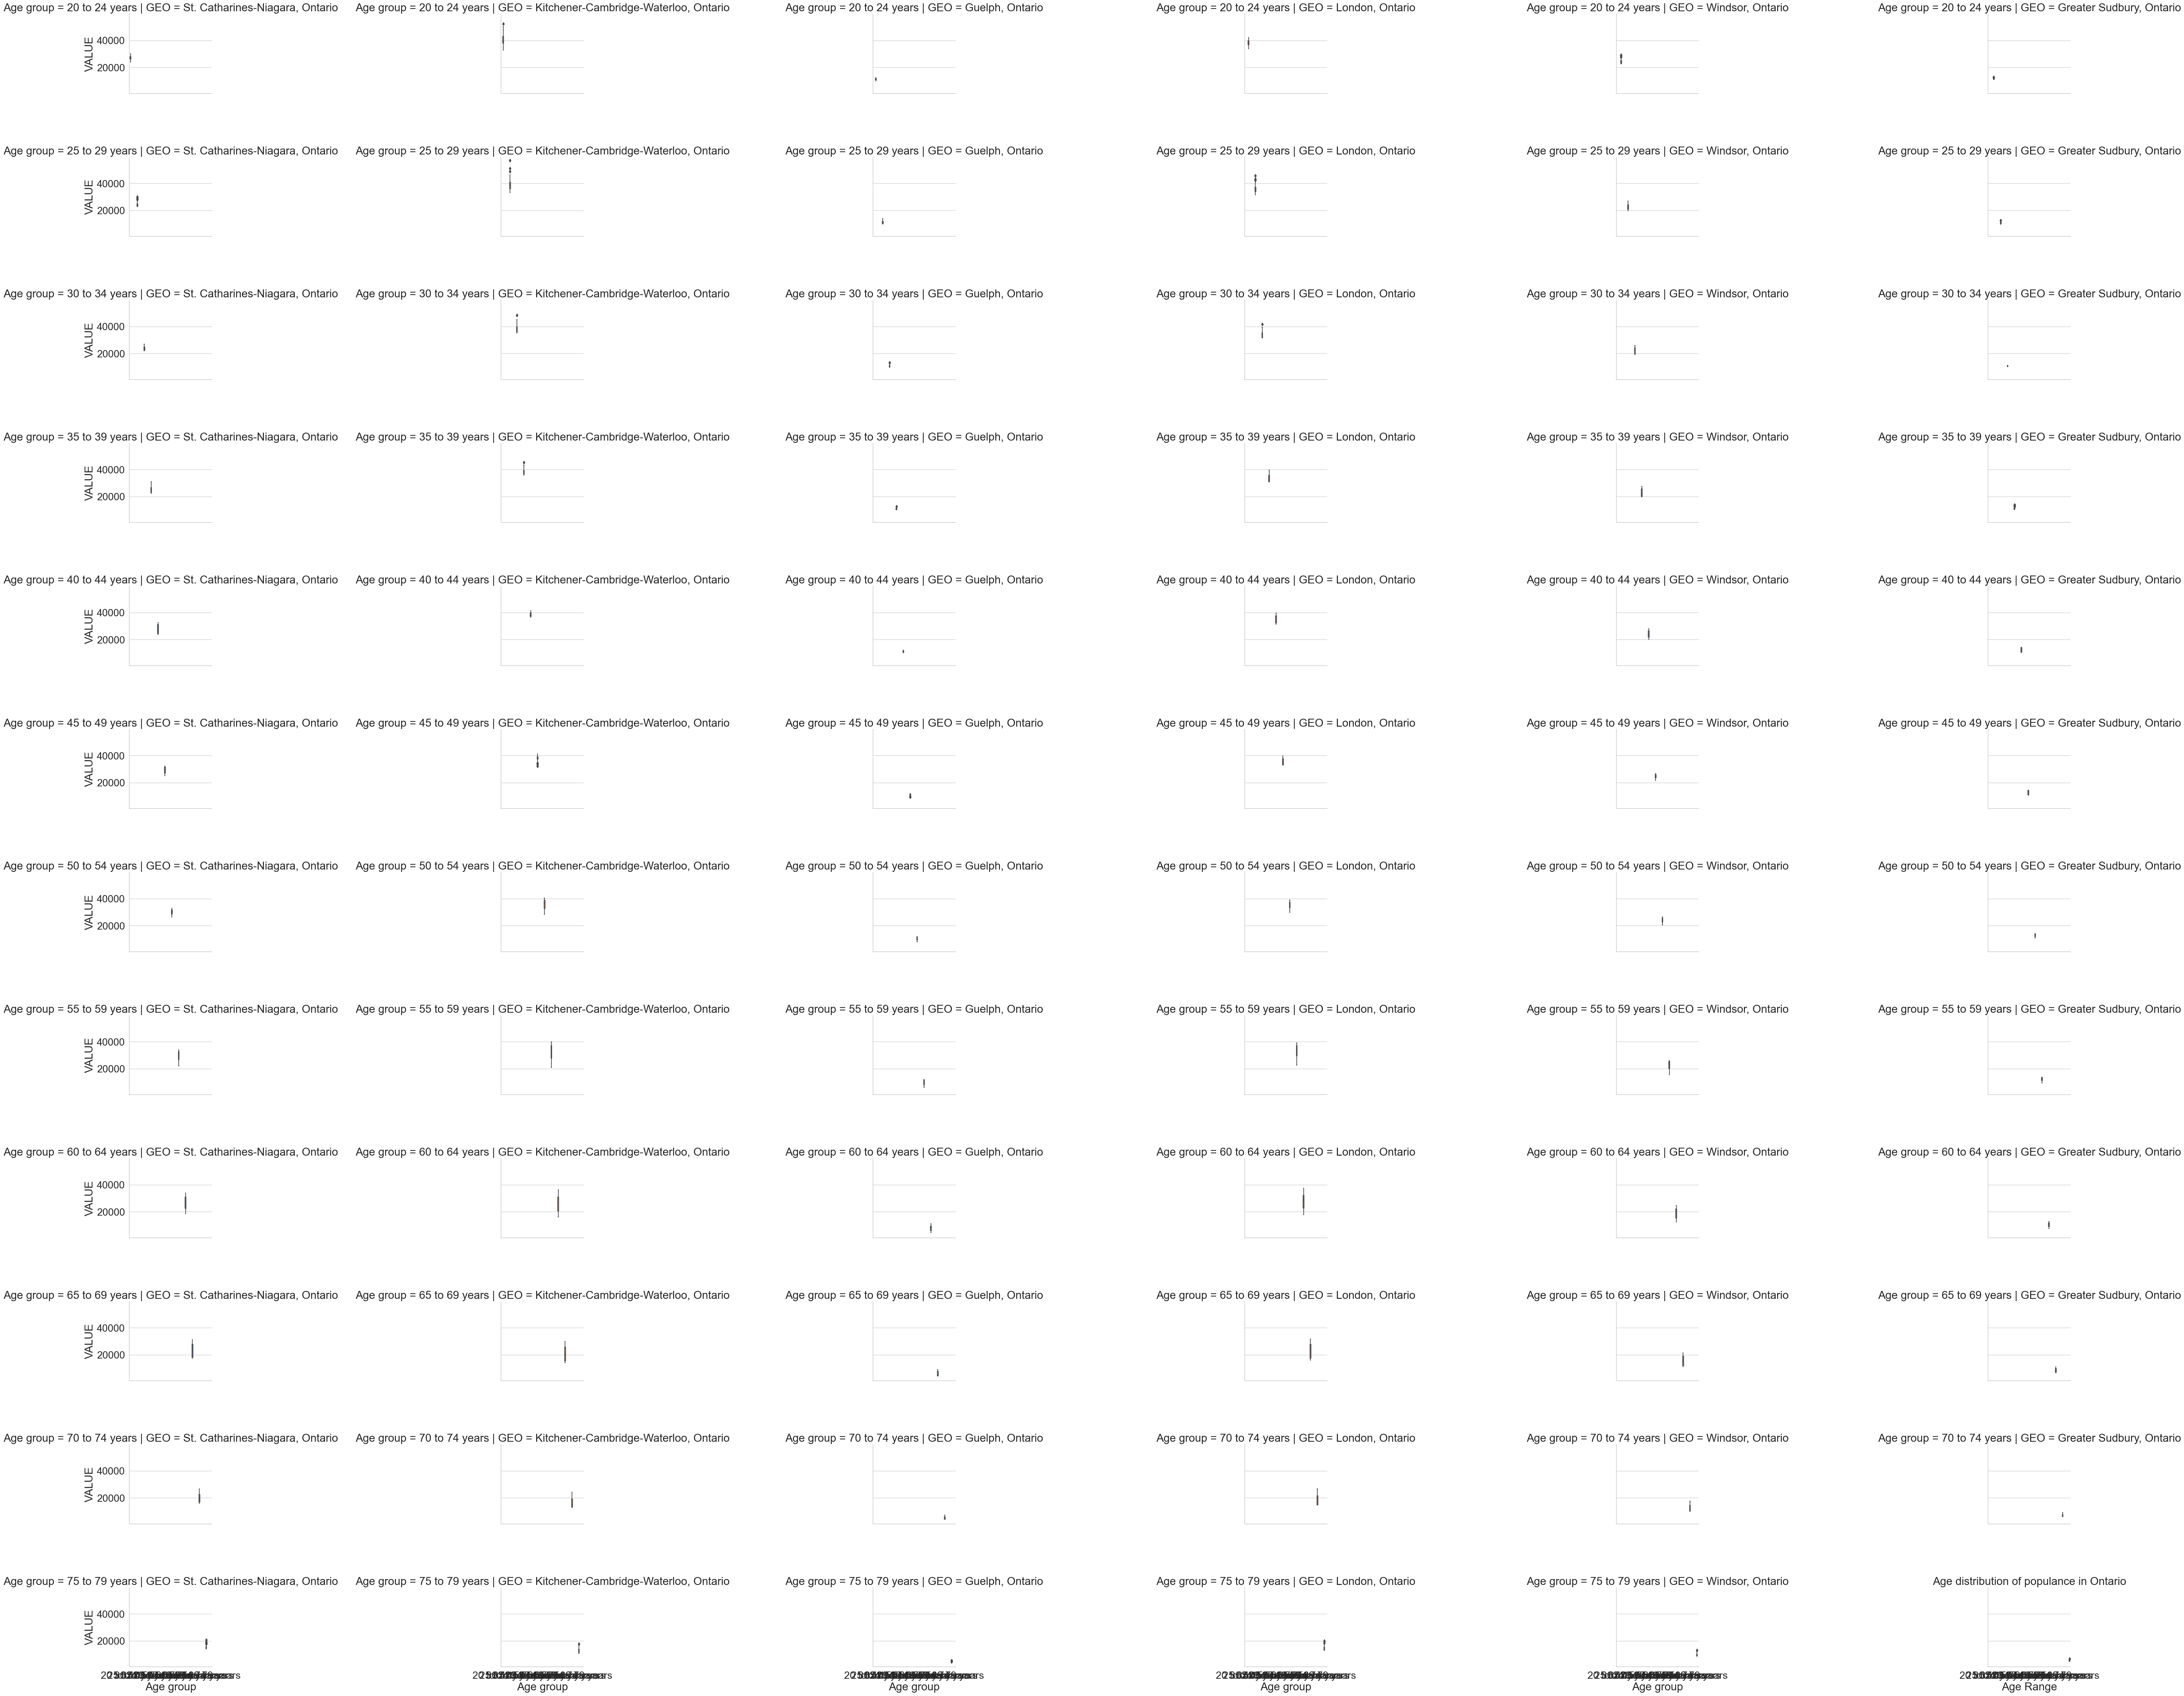

In [64]:
sns.catplot(x="Age group", y="VALUE", hue="GEO", kind="box", data=filtered_df_ONT, height=8.5, aspect=1.2, col="GEO", row="Age group")

plt.xlabel("Age Range")
plt.ylabel("Population")
plt.title("Age distribution of populance in Ontario")
plt.subplots_adjust(top=0.5, hspace=.8, wspace=3.5)

plt.show()

In [33]:
selected_cities_MAN = ['Winnipeg, Manitoba']
filtered_df_MAN = PE_Wrangled[PE_Wrangled['GEO'].isin(selected_cities_MAN)]
filtered_df_MAN

REF_DATE                 GEO         Sex       Age group      UOM  \
540    2001-01-01  Winnipeg, Manitoba  Both sexes  20 to 24 years  Persons   
541    2001-01-01  Winnipeg, Manitoba  Both sexes  25 to 29 years  Persons   
542    2001-01-01  Winnipeg, Manitoba  Both sexes  30 to 34 years  Persons   
543    2001-01-01  Winnipeg, Manitoba  Both sexes  35 to 39 years  Persons   
544    2001-01-01  Winnipeg, Manitoba  Both sexes  40 to 44 years  Persons   
...           ...                 ...         ...             ...      ...   
17935  2022-01-01  Winnipeg, Manitoba  Both sexes  55 to 59 years  Persons   
17936  2022-01-01  Winnipeg, Manitoba  Both sexes  60 to 64 years  Persons   
17937  2022-01-01  Winnipeg, Manitoba  Both sexes  65 to 69 years  Persons   
17938  2022-01-01  Winnipeg, Manitoba  Both sexes  70 to 74 years  Persons   
17939  2022-01-01  Winnipeg, Manitoba  Both sexes  75 to 79 years  Persons   

         VALUE  
540    50324.0  
541    49074.0  
542    48737.0  
543    57120.0  
544    57946.0  
...        ...  
17935  53297.0  
17936  53067.0  
17937  45695.0  
17938  37144.0  
17939  26238.0  

[264 rows x 6 columns]

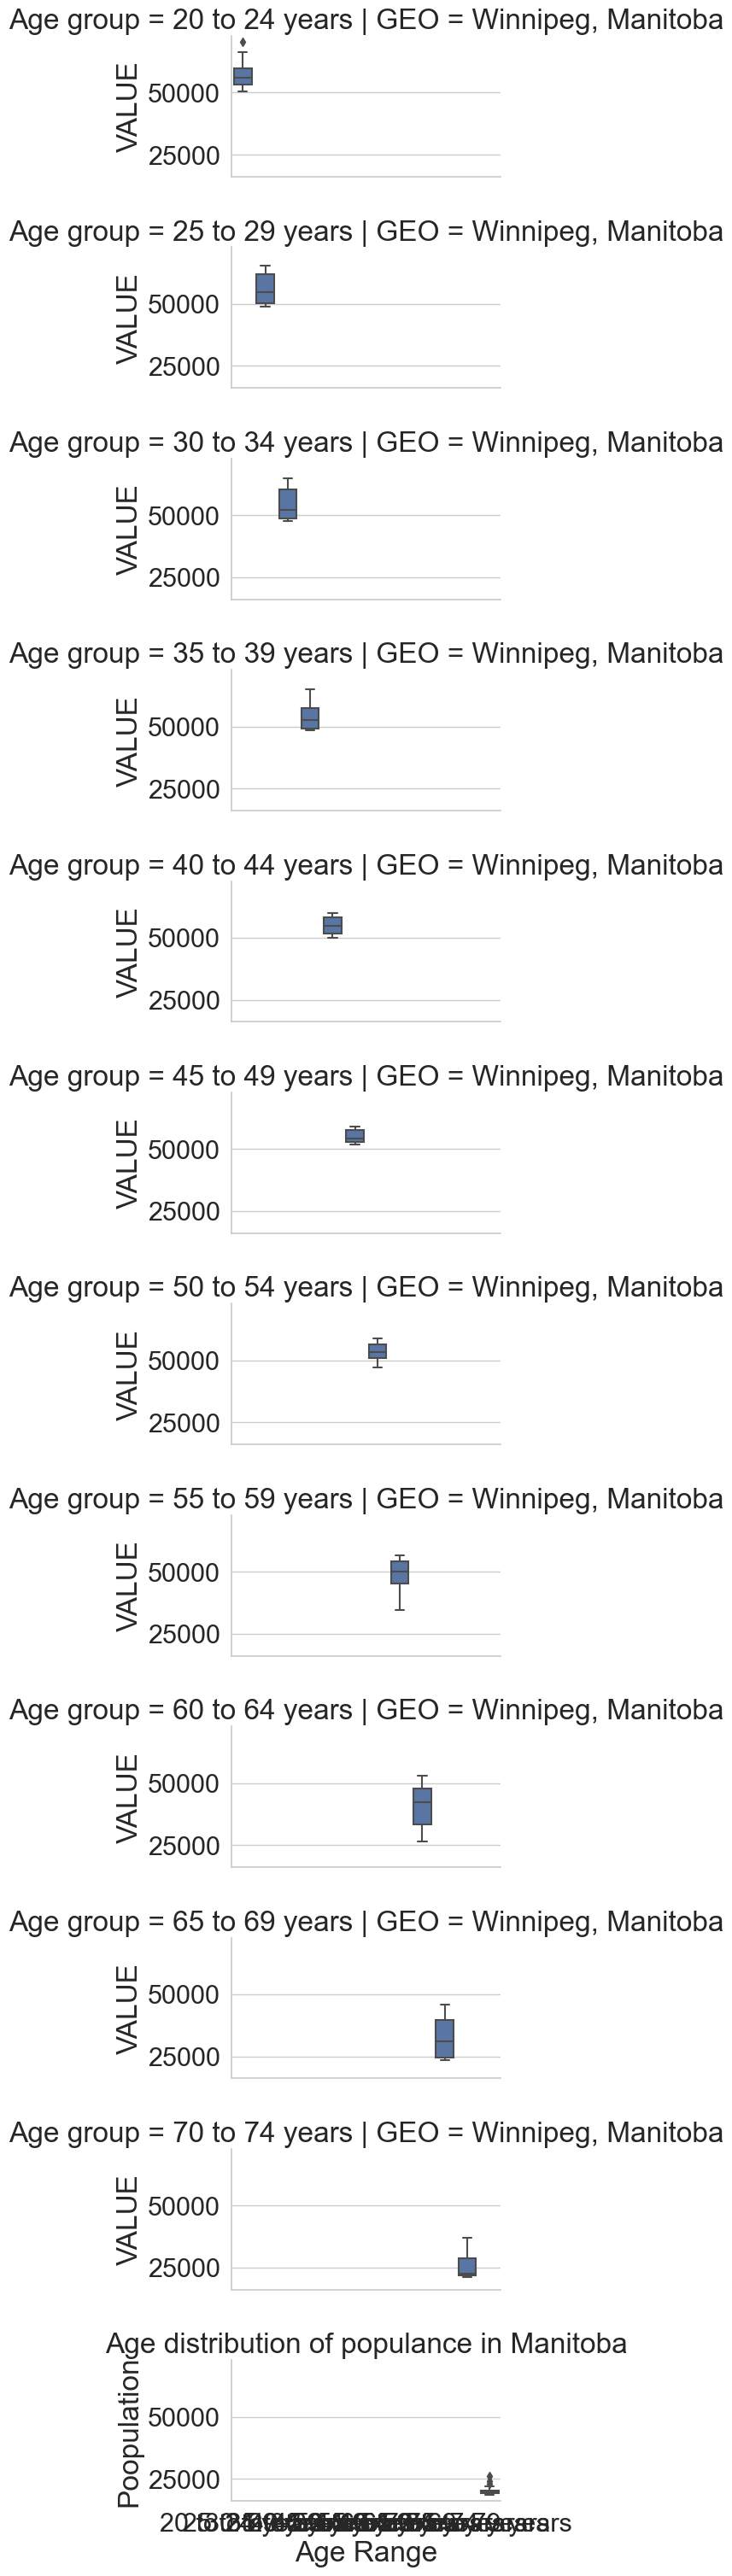

In [63]:
sns.catplot(x="Age group", y="VALUE", hue="GEO", kind="box", data=filtered_df_MAN, height=5, aspect=1.2, col="GEO", row="Age group")

plt.xlabel("Age Range")
plt.ylabel("Poopulation")
plt.title("Age distribution of populance in Manitoba")
plt.subplots_adjust(top=0.5, hspace=.5, wspace=.9)

plt.show()

In [35]:
selected_cities_SAS = ['Regina, Saskatchewan', 'Saskatoon, Saskatchewan']
filtered_df_SAS = PE_Wrangled[PE_Wrangled['GEO'].isin(selected_cities_SAS)]
filtered_df_SAS

REF_DATE                      GEO         Sex       Age group  \
576    2001-01-01     Regina, Saskatchewan  Both sexes  20 to 24 years   
577    2001-01-01     Regina, Saskatchewan  Both sexes  25 to 29 years   
578    2001-01-01     Regina, Saskatchewan  Both sexes  30 to 34 years   
579    2001-01-01     Regina, Saskatchewan  Both sexes  35 to 39 years   
580    2001-01-01     Regina, Saskatchewan  Both sexes  40 to 44 years   
...           ...                      ...         ...             ...   
18007  2022-01-01  Saskatoon, Saskatchewan  Both sexes  55 to 59 years   
18008  2022-01-01  Saskatoon, Saskatchewan  Both sexes  60 to 64 years   
18009  2022-01-01  Saskatoon, Saskatchewan  Both sexes  65 to 69 years   
18010  2022-01-01  Saskatoon, Saskatchewan  Both sexes  70 to 74 years   
18011  2022-01-01  Saskatoon, Saskatchewan  Both sexes  75 to 79 years   

           UOM    VALUE  
576    Persons  16141.0  
577    Persons  13633.0  
578    Persons  13200.0  
579    Persons  16056.0  
580    Persons  16448.0  
...        ...      ...  
18007  Persons  19338.0  
18008  Persons  19145.0  
18009  Persons  16643.0  
18010  Persons  12211.0  
18011  Persons   8363.0  

[528 rows x 6 columns]

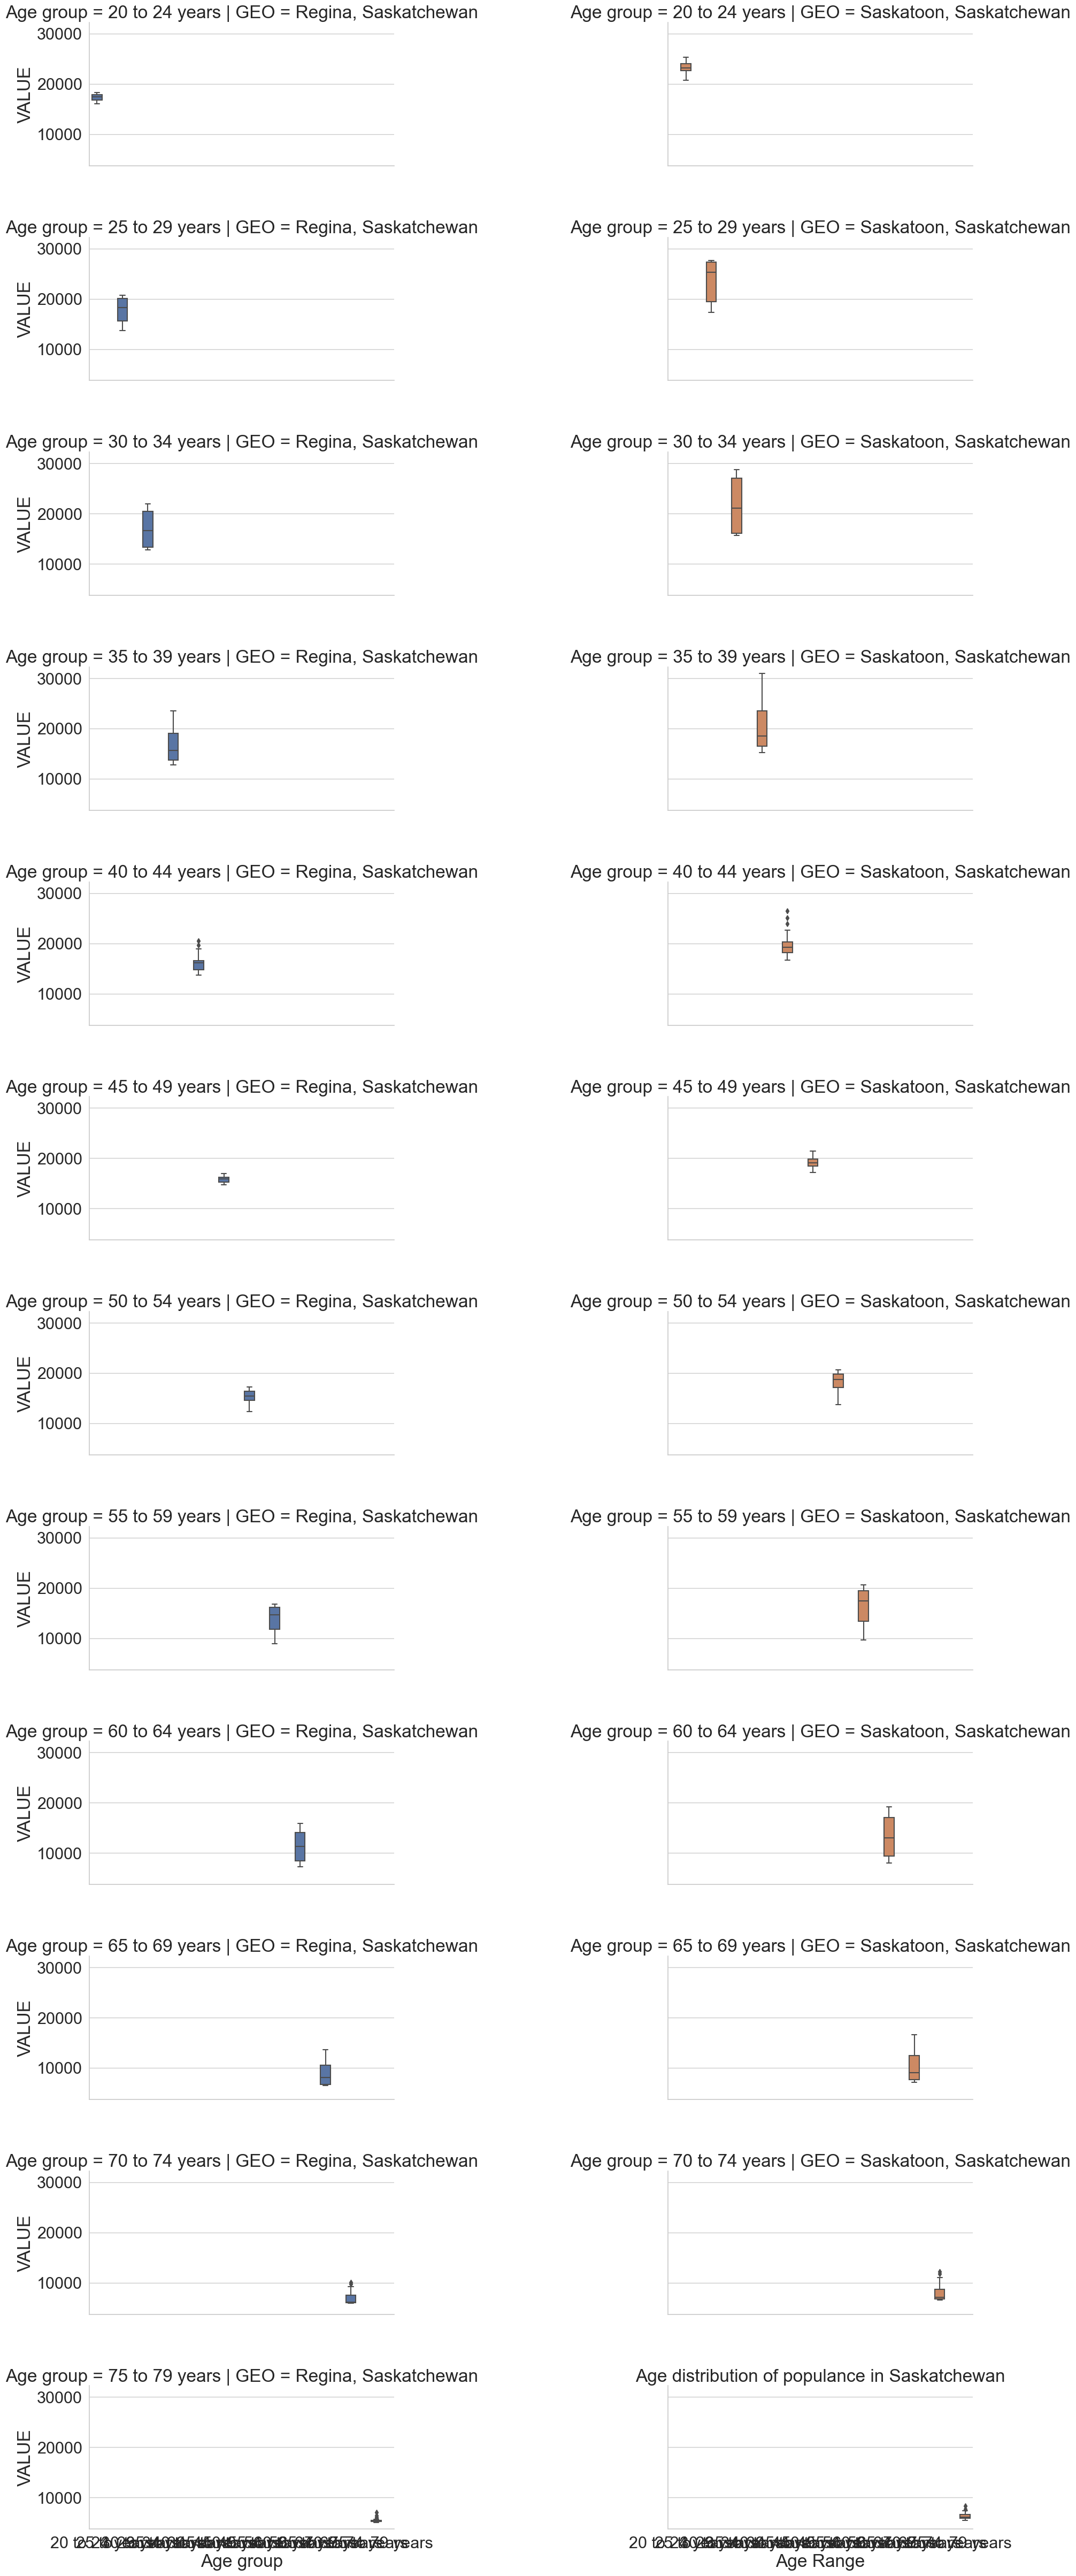

In [62]:
sns.catplot(x="Age group", y="VALUE", hue="GEO", kind="box", data=filtered_df_SAS, height=8, aspect=1.2, col="GEO", row="Age group")

plt.xlabel("Age Range")
plt.ylabel("Population")
plt.title("Age distribution of populance in Saskatchewan")
plt.subplots_adjust(top=0.5, hspace=.5, wspace=.9)

plt.show()

In [37]:
selected_cities_AB = ['Calgary, Alberta', 'Edmonton, Alberta']
filtered_df_AB = PE_Wrangled[PE_Wrangled['GEO'].isin(selected_cities_AB)]
filtered_df_AB

REF_DATE                GEO         Sex       Age group      UOM  \
648    2001-01-01   Calgary, Alberta  Both sexes  20 to 24 years  Persons   
649    2001-01-01   Calgary, Alberta  Both sexes  25 to 29 years  Persons   
650    2001-01-01   Calgary, Alberta  Both sexes  30 to 34 years  Persons   
651    2001-01-01   Calgary, Alberta  Both sexes  35 to 39 years  Persons   
652    2001-01-01   Calgary, Alberta  Both sexes  40 to 44 years  Persons   
...           ...                ...         ...             ...      ...   
18079  2022-01-01  Edmonton, Alberta  Both sexes  55 to 59 years  Persons   
18080  2022-01-01  Edmonton, Alberta  Both sexes  60 to 64 years  Persons   
18081  2022-01-01  Edmonton, Alberta  Both sexes  65 to 69 years  Persons   
18082  2022-01-01  Edmonton, Alberta  Both sexes  70 to 74 years  Persons   
18083  2022-01-01  Edmonton, Alberta  Both sexes  75 to 79 years  Persons   

         VALUE  
648    75229.0  
649    81150.0  
650    82399.0  
651    89266.0  
652    92526.0  
...        ...  
18079  88783.0  
18080  88357.0  
18081  75434.0  
18082  55964.0  
18083  38336.0  

[528 rows x 6 columns]

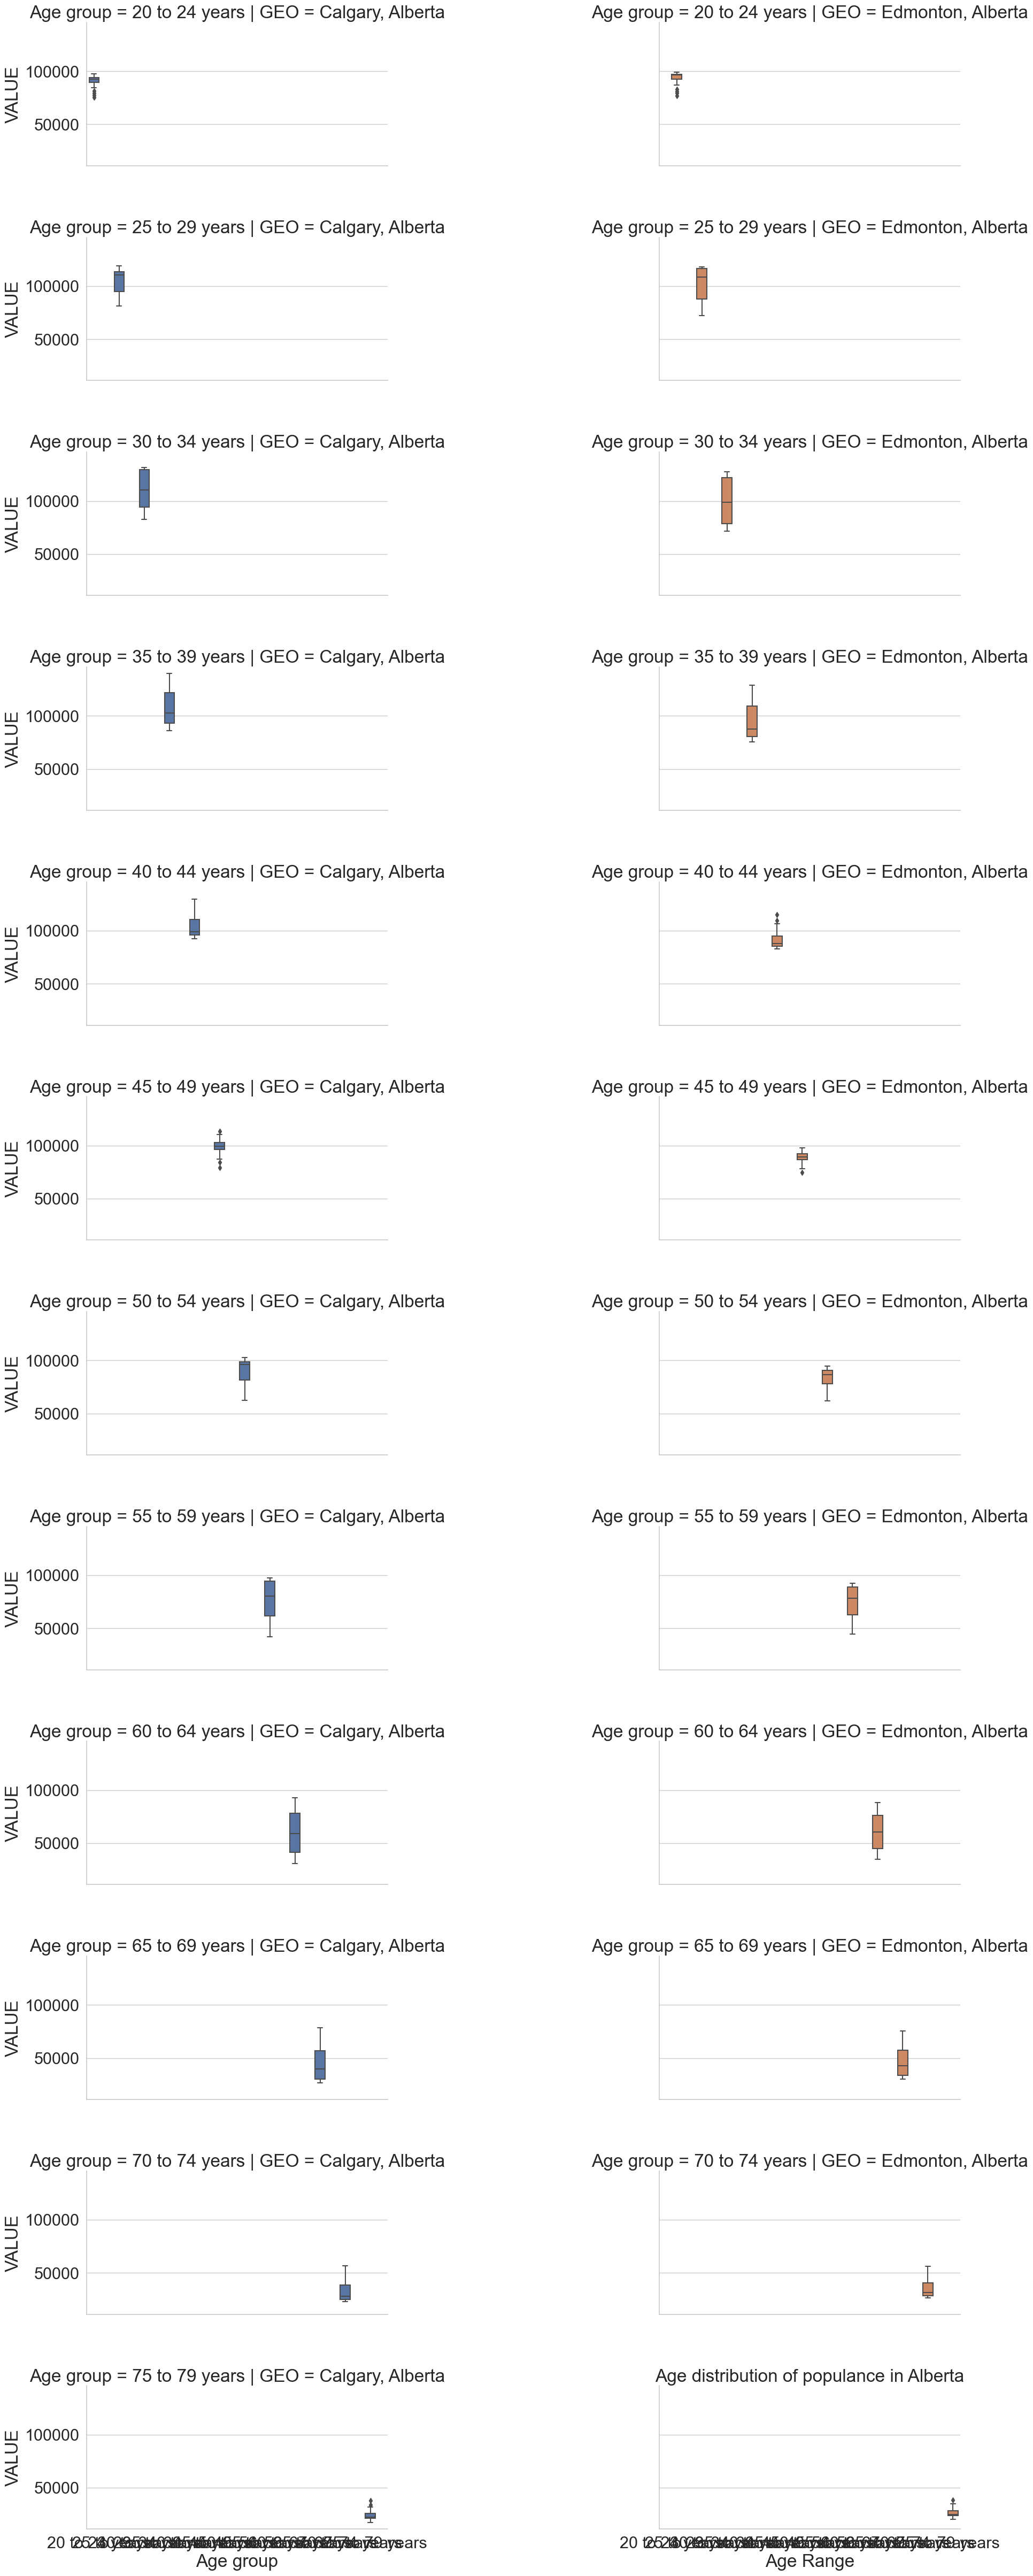

In [61]:
sns.catplot(x="Age group", y="VALUE", hue="GEO", kind="box", data=filtered_df_AB, height=8, aspect=1.2, col="GEO", row="Age group")

plt.xlabel("Age Range")
plt.ylabel("Population")
plt.title("Age distribution of populance in Alberta")
plt.subplots_adjust(top=0.5, hspace=.5, wspace=.9)

plt.show()

In [39]:
selected_cities_BC = ['Vancouver, British Columbia', 'Victoria, British Columbia', 'Kelowna, British Columbia']
filtered_df_BC = PE_Wrangled[PE_Wrangled['GEO'].isin(selected_cities_BC)]
filtered_df_BC

REF_DATE                         GEO         Sex       Age group  \
720    2001-01-01   Kelowna, British Columbia  Both sexes  20 to 24 years   
721    2001-01-01   Kelowna, British Columbia  Both sexes  25 to 29 years   
722    2001-01-01   Kelowna, British Columbia  Both sexes  30 to 34 years   
723    2001-01-01   Kelowna, British Columbia  Both sexes  35 to 39 years   
724    2001-01-01   Kelowna, British Columbia  Both sexes  40 to 44 years   
...           ...                         ...         ...             ...   
18187  2022-01-01  Victoria, British Columbia  Both sexes  55 to 59 years   
18188  2022-01-01  Victoria, British Columbia  Both sexes  60 to 64 years   
18189  2022-01-01  Victoria, British Columbia  Both sexes  65 to 69 years   
18190  2022-01-01  Victoria, British Columbia  Both sexes  70 to 74 years   
18191  2022-01-01  Victoria, British Columbia  Both sexes  75 to 79 years   

           UOM    VALUE  
720    Persons   8994.0  
721    Persons   8558.0  
722    Persons   9657.0  
723    Persons  11783.0  
724    Persons  12635.0  
...        ...      ...  
18187  Persons  28203.0  
18188  Persons  29948.0  
18189  Persons  28684.0  
18190  Persons  25530.0  
18191  Persons  18480.0  

[792 rows x 6 columns]

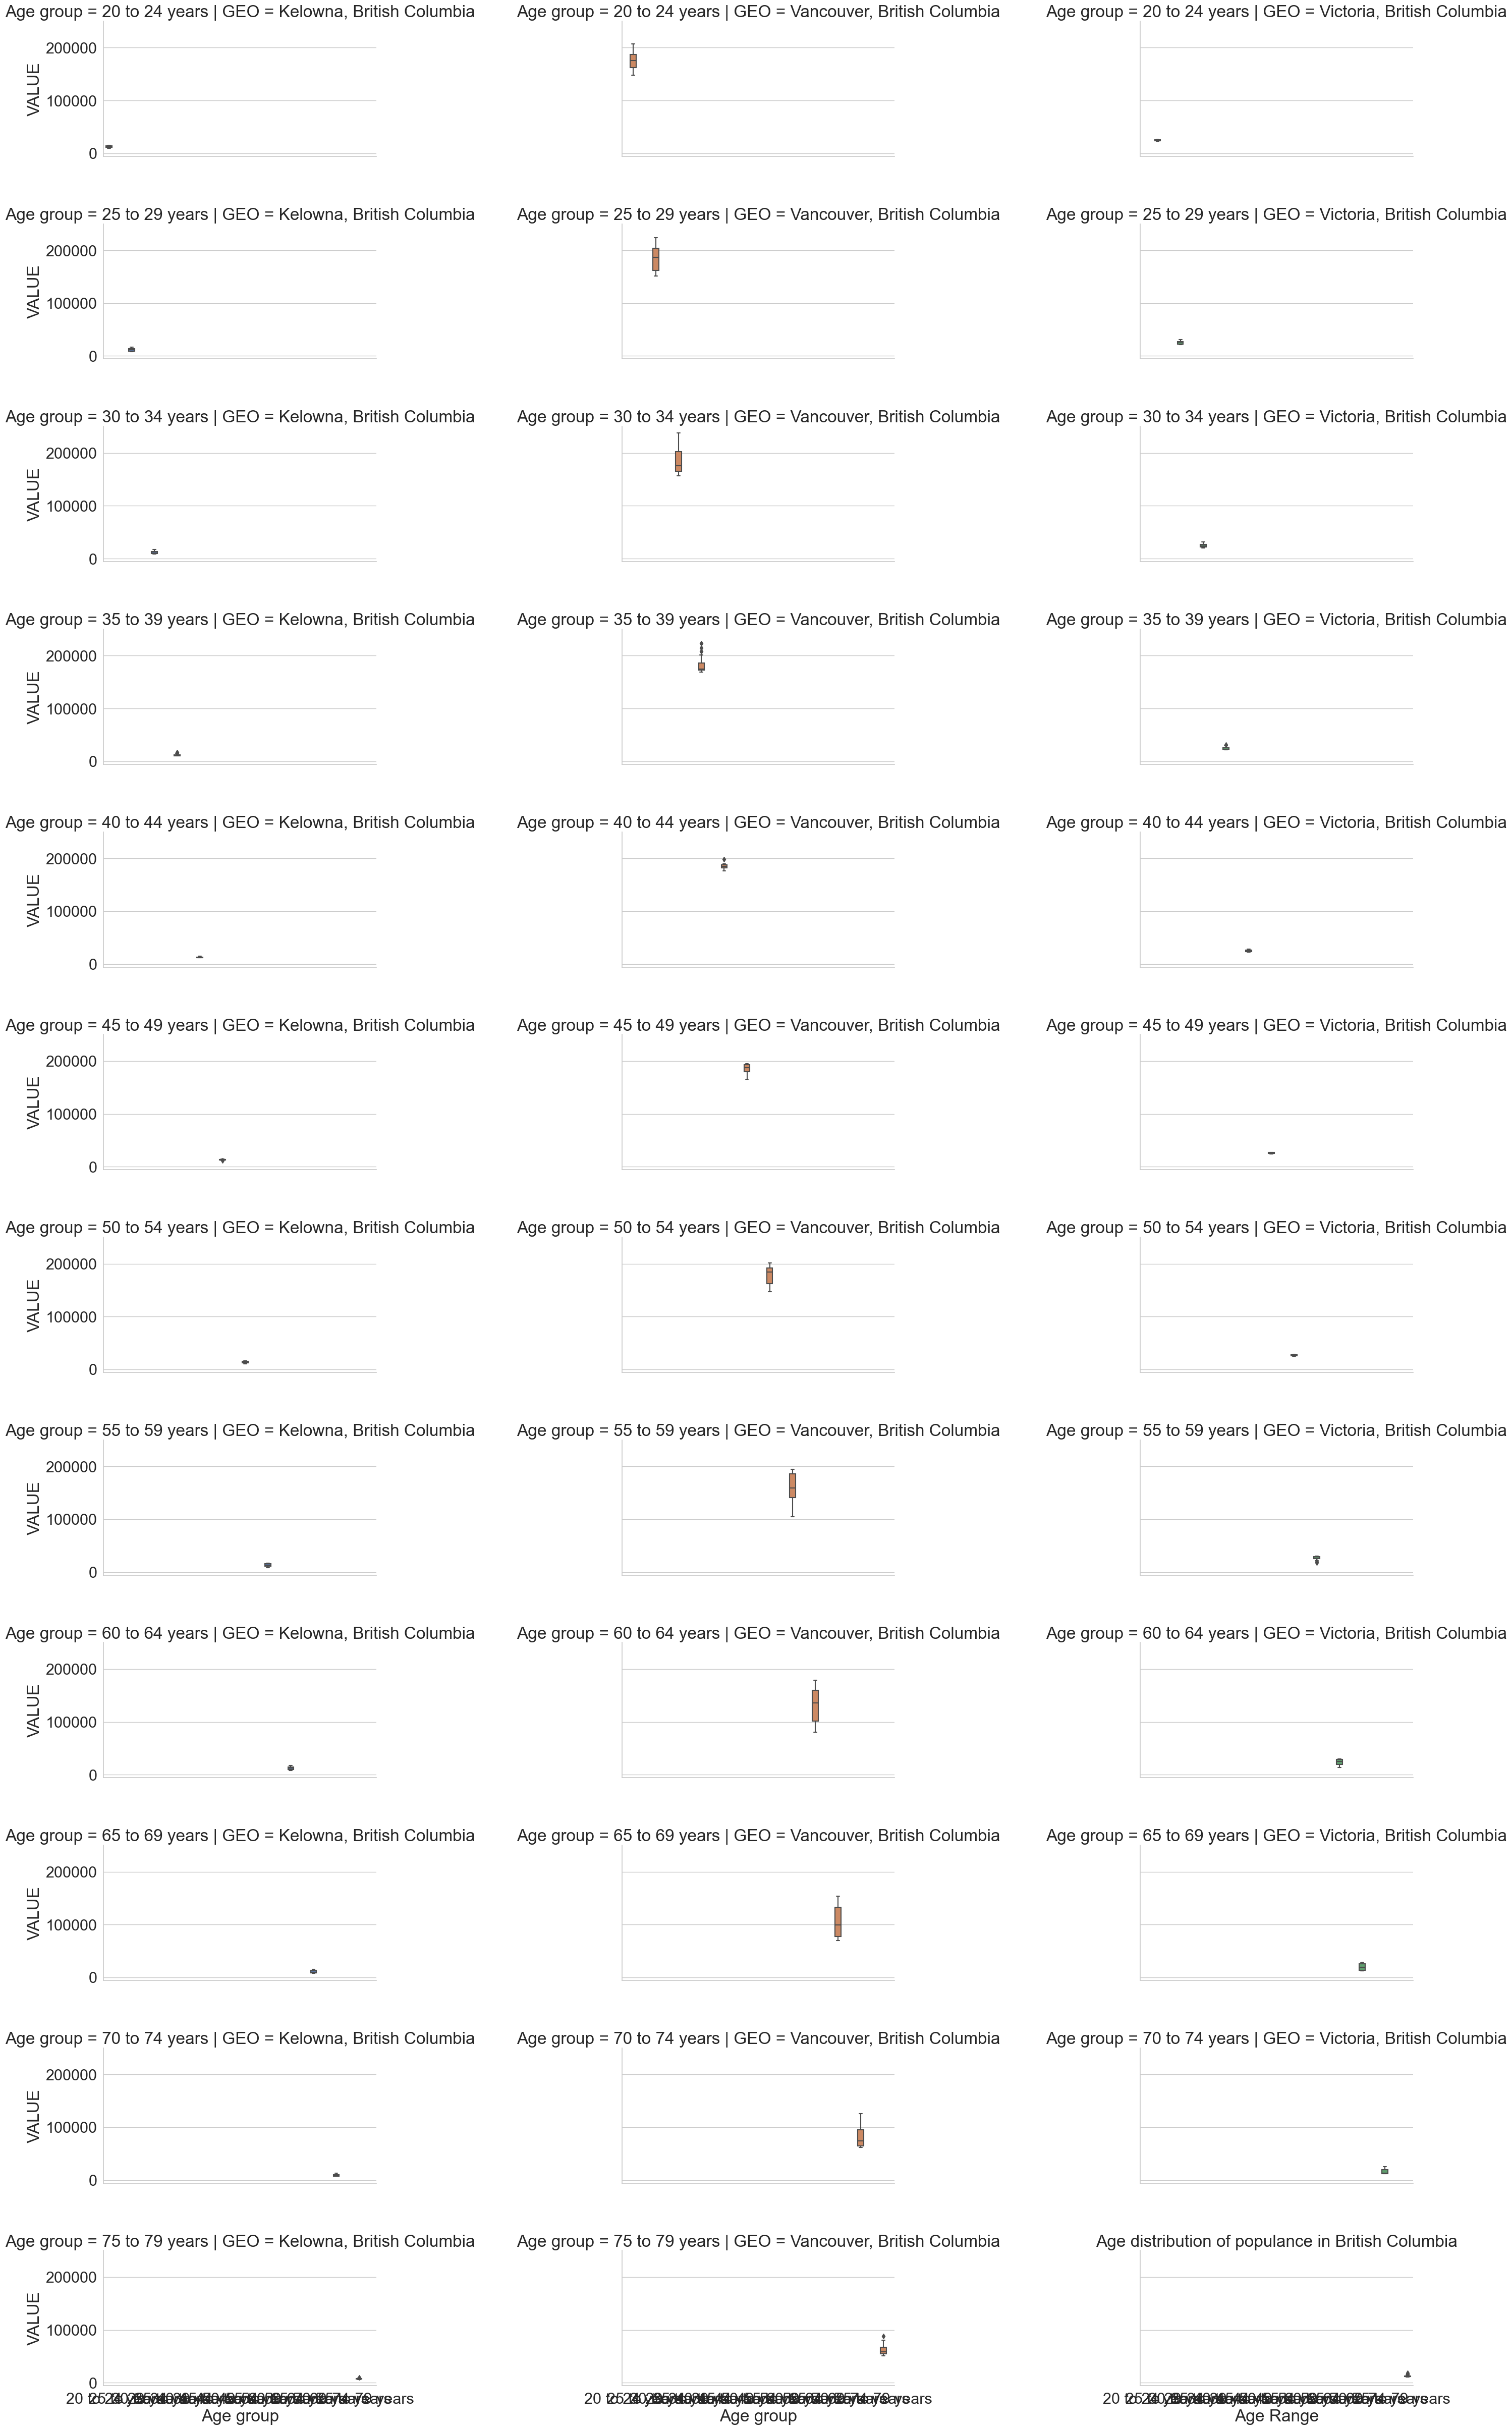

In [60]:
sns.catplot(x="Age group", y="VALUE", hue="GEO", kind="box", data=filtered_df_BC, height=8, aspect=1.2, col="GEO", row="Age group")

plt.xlabel("Age Range")
plt.ylabel("Population")
plt.title("Age distribution of populance in British Columbia")
plt.subplots_adjust(top=0.5, hspace=.5, wspace=.9)

plt.show()

This is alot of information and its very hard to look at, based on feedback recived i will narrow it down to the five cities with the highest count of age group. 

### Based on a facet grid i previously made, the highest city with total count of age group is Toronto. In descending order it then goes Montreal, Vancouver, Calgary then Edmonton. 

In [41]:
selected_cities_TN = ['Toronto, Ontario']
filtered_df_TN = PE_Wrangled[PE_Wrangled['GEO'].isin(selected_cities_TN)]
filtered_df_TN

REF_DATE               GEO         Sex       Age group      UOM  \
252    2001-01-01  Toronto, Ontario  Both sexes  20 to 24 years  Persons   
253    2001-01-01  Toronto, Ontario  Both sexes  25 to 29 years  Persons   
254    2001-01-01  Toronto, Ontario  Both sexes  30 to 34 years  Persons   
255    2001-01-01  Toronto, Ontario  Both sexes  35 to 39 years  Persons   
256    2001-01-01  Toronto, Ontario  Both sexes  40 to 44 years  Persons   
...           ...               ...         ...             ...      ...   
17647  2022-01-01  Toronto, Ontario  Both sexes  55 to 59 years  Persons   
17648  2022-01-01  Toronto, Ontario  Both sexes  60 to 64 years  Persons   
17649  2022-01-01  Toronto, Ontario  Both sexes  65 to 69 years  Persons   
17650  2022-01-01  Toronto, Ontario  Both sexes  70 to 74 years  Persons   
17651  2022-01-01  Toronto, Ontario  Both sexes  75 to 79 years  Persons   

          VALUE  
252    333254.0  
253    366422.0  
254    411663.0  
255    454574.0  
256    419878.0  
...         ...  
17647  444166.0  
17648  400586.0  
17649  327989.0  
17650  266575.0  
17651  197868.0  

[264 rows x 6 columns]

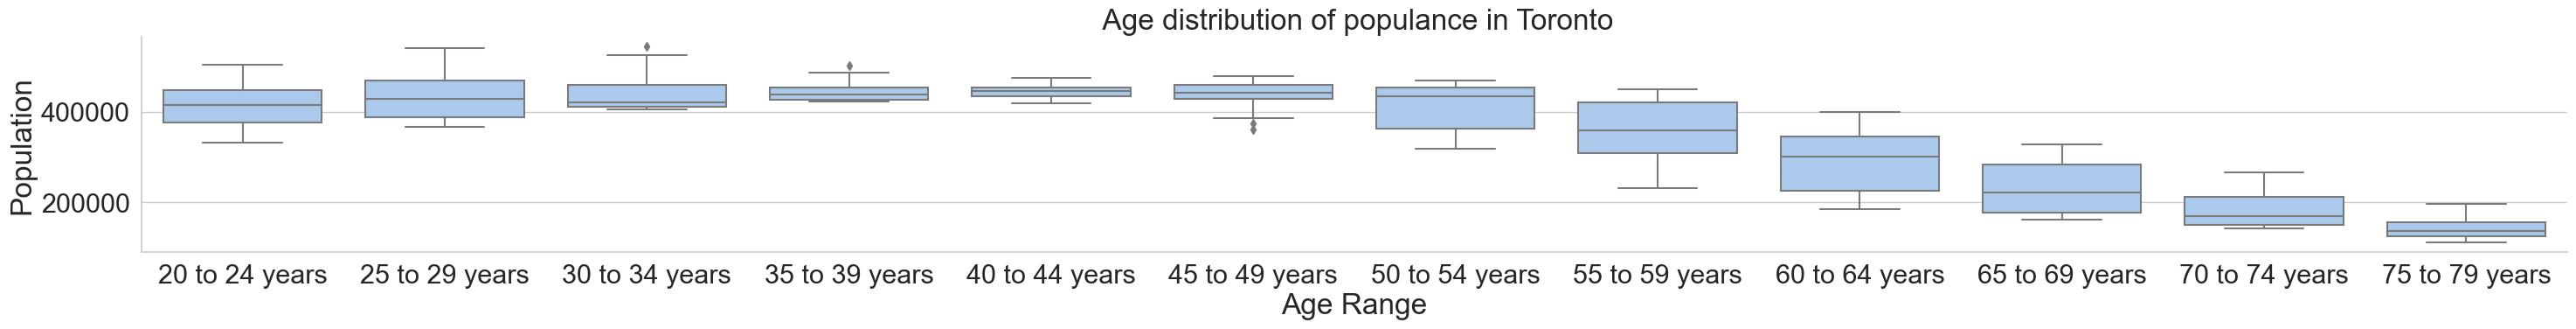

In [55]:
sns.catplot(x="Age group", y="VALUE", hue="GEO", kind="box", data=filtered_df_TN, height=4, aspect=7.5, col="GEO", row="GEO", palette='pastel')

plt.xlabel("Age Range")
plt.ylabel("Population")
plt.title("Age distribution of populance in Toronto")
plt.subplots_adjust(top=0.9, hspace=1, wspace=1)

plt.show()

In [43]:
selected_cities_MON = ['Montréal, Quebec']
filtered_df_MON = PE_Wrangled[PE_Wrangled['GEO'].isin(selected_cities_MON)]
filtered_df_MON

REF_DATE               GEO         Sex       Age group      UOM  \
180    2001-01-01  Montréal, Quebec  Both sexes  20 to 24 years  Persons   
181    2001-01-01  Montréal, Quebec  Both sexes  25 to 29 years  Persons   
182    2001-01-01  Montréal, Quebec  Both sexes  30 to 34 years  Persons   
183    2001-01-01  Montréal, Quebec  Both sexes  35 to 39 years  Persons   
184    2001-01-01  Montréal, Quebec  Both sexes  40 to 44 years  Persons   
...           ...               ...         ...             ...      ...   
17575  2022-01-01  Montréal, Quebec  Both sexes  55 to 59 years  Persons   
17576  2022-01-01  Montréal, Quebec  Both sexes  60 to 64 years  Persons   
17577  2022-01-01  Montréal, Quebec  Both sexes  65 to 69 years  Persons   
17578  2022-01-01  Montréal, Quebec  Both sexes  70 to 74 years  Persons   
17579  2022-01-01  Montréal, Quebec  Both sexes  75 to 79 years  Persons   

          VALUE  
180    261069.0  
181    254750.0  
182    269964.0  
183    316527.0  
184    317236.0  
...         ...  
17575  291614.0  
17576  278023.0  
17577  236218.0  
17578  195503.0  
17579  153486.0  

[264 rows x 6 columns]

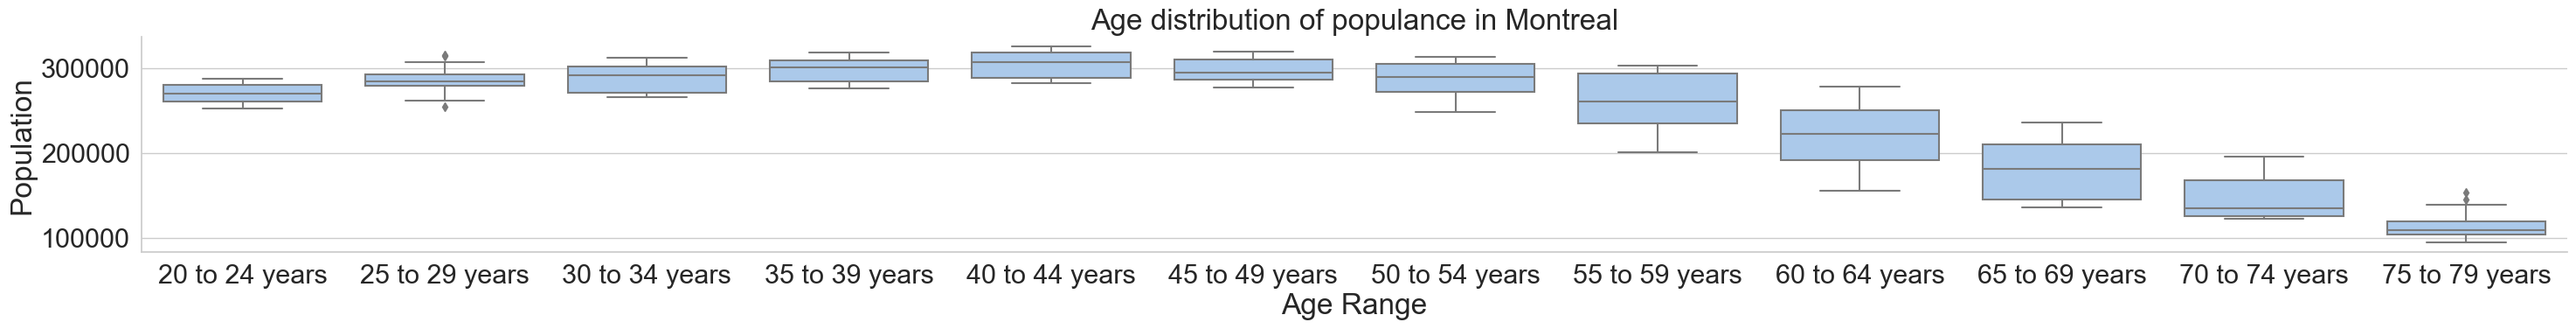

In [56]:
sns.catplot(x="Age group", y="VALUE", hue="GEO", kind="box", data=filtered_df_MON, height=4, aspect=7.5, col="GEO", row="GEO", palette='pastel')

plt.xlabel("Age Range")
plt.ylabel("Population")
plt.title("Age distribution of populance in Montreal")
plt.subplots_adjust(top=0.9, hspace=1, wspace=1)

plt.show()

In [45]:
selected_cities_VAN = ['Vancouver, British Columbia']
filtered_df_VAN = PE_Wrangled[PE_Wrangled['GEO'].isin(selected_cities_VAN)]
filtered_df_VAN

REF_DATE                          GEO         Sex       Age group  \
756    2001-01-01  Vancouver, British Columbia  Both sexes  20 to 24 years   
757    2001-01-01  Vancouver, British Columbia  Both sexes  25 to 29 years   
758    2001-01-01  Vancouver, British Columbia  Both sexes  30 to 34 years   
759    2001-01-01  Vancouver, British Columbia  Both sexes  35 to 39 years   
760    2001-01-01  Vancouver, British Columbia  Both sexes  40 to 44 years   
...           ...                          ...         ...             ...   
18151  2022-01-01  Vancouver, British Columbia  Both sexes  55 to 59 years   
18152  2022-01-01  Vancouver, British Columbia  Both sexes  60 to 64 years   
18153  2022-01-01  Vancouver, British Columbia  Both sexes  65 to 69 years   
18154  2022-01-01  Vancouver, British Columbia  Both sexes  70 to 74 years   
18155  2022-01-01  Vancouver, British Columbia  Both sexes  75 to 79 years   

           UOM     VALUE  
756    Persons  148107.0  
757    Persons  153763.0  
758    Persons  172163.0  
759    Persons  184911.0  
760    Persons  181262.0  
...        ...       ...  
18151  Persons  191116.0  
18152  Persons  179295.0  
18153  Persons  153897.0  
18154  Persons  126083.0  
18155  Persons   88064.0  

[264 rows x 6 columns]

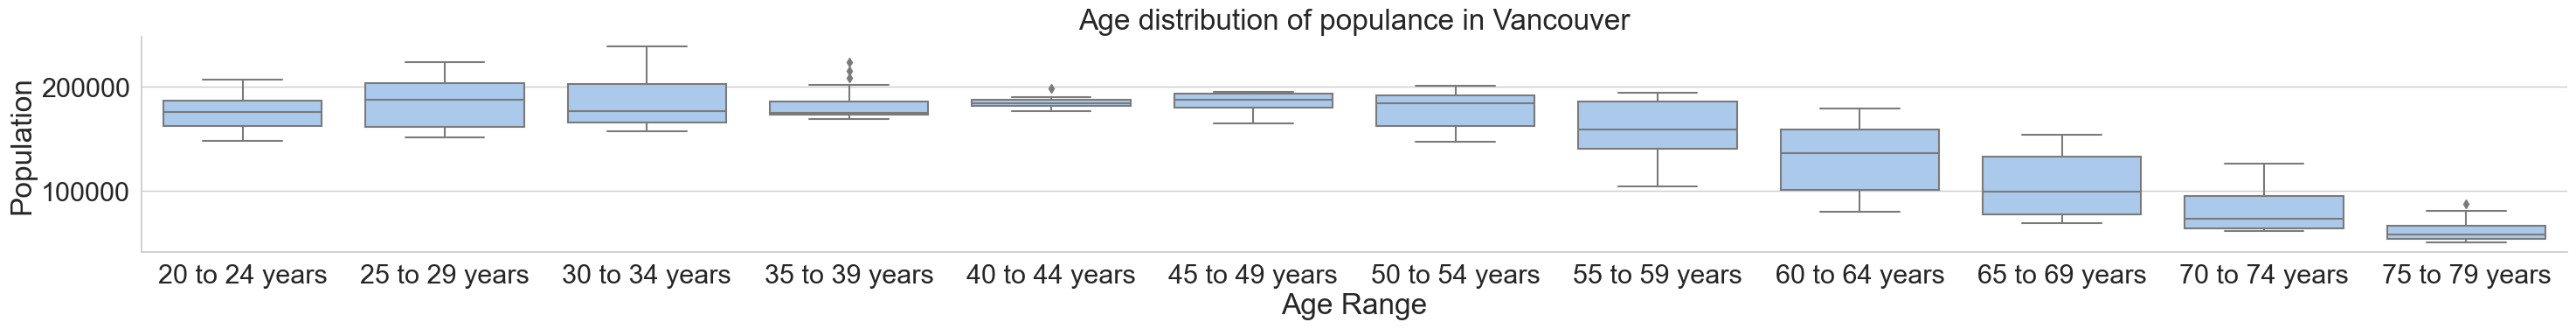

In [57]:
sns.catplot(x="Age group", y="VALUE", hue="GEO", kind="box", data=filtered_df_VAN, height=4, aspect=7.5, col="GEO", row="GEO", palette='pastel')

plt.xlabel("Age Range")
plt.ylabel("Population")
plt.title("Age distribution of populance in Vancouver")
plt.subplots_adjust(top=0.9, hspace=1, wspace=1)

plt.show()

In [47]:
selected_cities_CAL = ['Calgary, Alberta']
filtered_df_CAL = PE_Wrangled[PE_Wrangled['GEO'].isin(selected_cities_CAL)]
filtered_df_CAL

REF_DATE               GEO         Sex       Age group      UOM  \
648    2001-01-01  Calgary, Alberta  Both sexes  20 to 24 years  Persons   
649    2001-01-01  Calgary, Alberta  Both sexes  25 to 29 years  Persons   
650    2001-01-01  Calgary, Alberta  Both sexes  30 to 34 years  Persons   
651    2001-01-01  Calgary, Alberta  Both sexes  35 to 39 years  Persons   
652    2001-01-01  Calgary, Alberta  Both sexes  40 to 44 years  Persons   
...           ...               ...         ...             ...      ...   
18043  2022-01-01  Calgary, Alberta  Both sexes  55 to 59 years  Persons   
18044  2022-01-01  Calgary, Alberta  Both sexes  60 to 64 years  Persons   
18045  2022-01-01  Calgary, Alberta  Both sexes  65 to 69 years  Persons   
18046  2022-01-01  Calgary, Alberta  Both sexes  70 to 74 years  Persons   
18047  2022-01-01  Calgary, Alberta  Both sexes  75 to 79 years  Persons   

         VALUE  
648    75229.0  
649    81150.0  
650    82399.0  
651    89266.0  
652    92526.0  
...        ...  
18043  95520.0  
18044  92803.0  
18045  78372.0  
18046  56688.0  
18047  37926.0  

[264 rows x 6 columns]

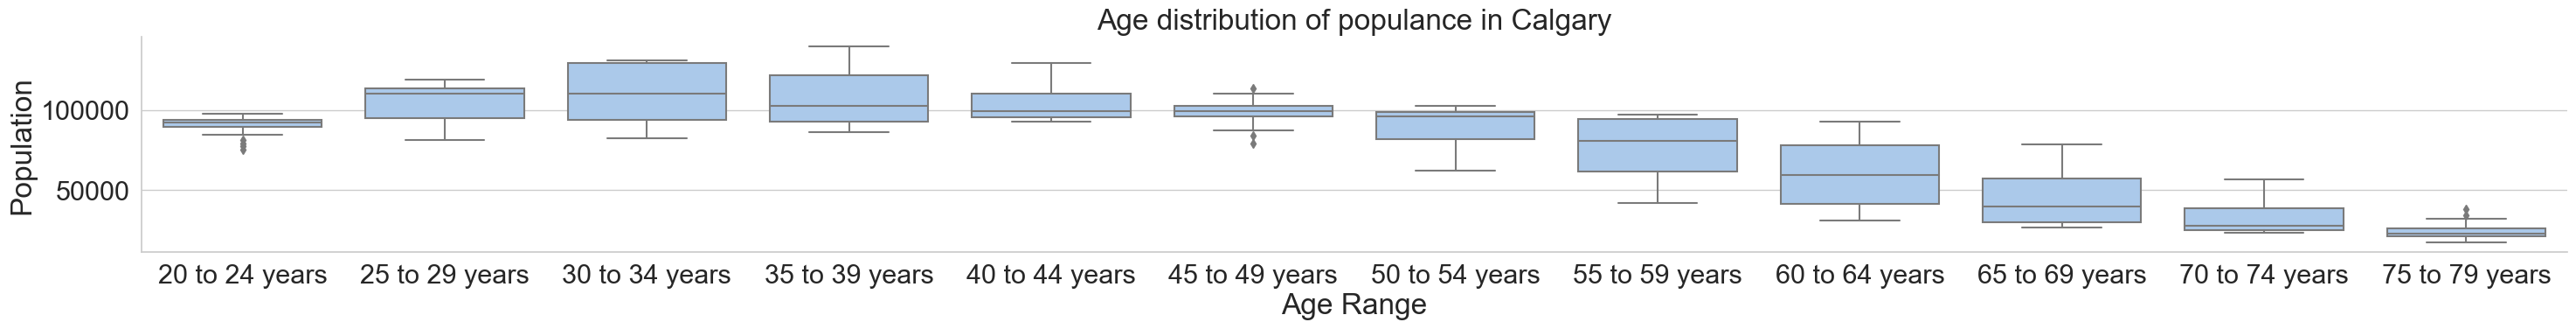

In [58]:
sns.catplot(x="Age group", y="VALUE", hue="GEO", kind="box", data=filtered_df_CAL, height=4, aspect=7.5, col="GEO", row="GEO", palette='pastel')

plt.xlabel("Age Range")
plt.ylabel("Population")
plt.title("Age distribution of populance in Calgary")
plt.subplots_adjust(top=0.9, hspace=1, wspace=1)

plt.show()

In [49]:
selected_cities_EDM = ['Edmonton, Alberta']
filtered_df_EDM = PE_Wrangled[PE_Wrangled['GEO'].isin(selected_cities_EDM)]
filtered_df_EDM

REF_DATE                GEO         Sex       Age group      UOM  \
684    2001-01-01  Edmonton, Alberta  Both sexes  20 to 24 years  Persons   
685    2001-01-01  Edmonton, Alberta  Both sexes  25 to 29 years  Persons   
686    2001-01-01  Edmonton, Alberta  Both sexes  30 to 34 years  Persons   
687    2001-01-01  Edmonton, Alberta  Both sexes  35 to 39 years  Persons   
688    2001-01-01  Edmonton, Alberta  Both sexes  40 to 44 years  Persons   
...           ...                ...         ...             ...      ...   
18079  2022-01-01  Edmonton, Alberta  Both sexes  55 to 59 years  Persons   
18080  2022-01-01  Edmonton, Alberta  Both sexes  60 to 64 years  Persons   
18081  2022-01-01  Edmonton, Alberta  Both sexes  65 to 69 years  Persons   
18082  2022-01-01  Edmonton, Alberta  Both sexes  70 to 74 years  Persons   
18083  2022-01-01  Edmonton, Alberta  Both sexes  75 to 79 years  Persons   

         VALUE  
684    77028.0  
685    72213.0  
686    71777.0  
687    81664.0  
688    85088.0  
...        ...  
18079  88783.0  
18080  88357.0  
18081  75434.0  
18082  55964.0  
18083  38336.0  

[264 rows x 6 columns]

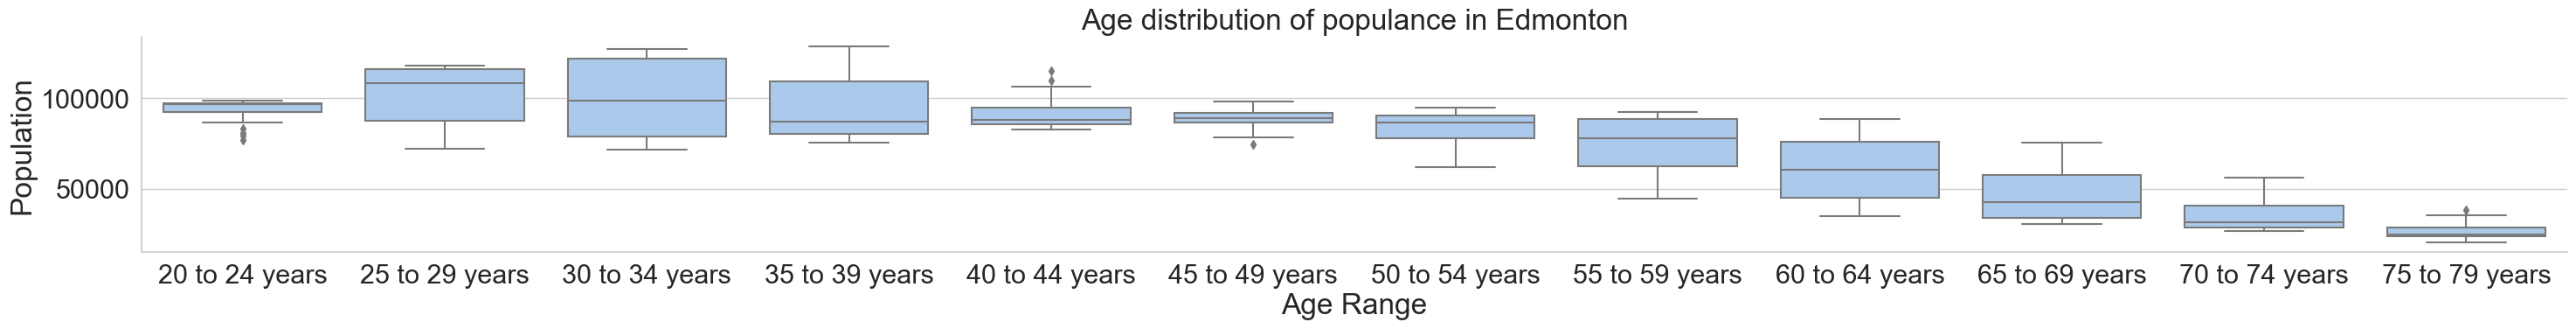

In [59]:
sns.catplot(x="Age group", y="VALUE", hue="GEO", kind="box", data=filtered_df_EDM, height=4, aspect=7.5, col="GEO", row="GEO", palette='pastel')

plt.xlabel("Age Range")
plt.ylabel("Population")
plt.title("Age distribution of populance in Edmonton")
plt.subplots_adjust(top=0.9, hspace=1, wspace=1)

plt.show()